Step1: Compare Hum1(SEB) and Hum2(SEB) performances 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data and fix missing values
file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

hum_sheets = ['Hum1', 'Hum2']
dfs_hum = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in hum_sheets}

numeric_cols = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

for name, df in dfs_hum.items():
    print(f"Missing values in {name} before filling:")
    print(df[numeric_cols].isna().sum())
    print("\n")

dfs_hum['Hum1'][numeric_cols] = dfs_hum['Hum1'][numeric_cols].fillna(dfs_hum['Hum1'][numeric_cols].mean())

for name, df in dfs_hum.items():
    print(f"Missing values in {name} after filling (Hum2 should be intact):")
    print(df[numeric_cols].isna().sum())
    print("\n")

Missing values in Hum1 before filling:
accuracy_score        11
efficiency_score      11
politeness_score      11
trust_score           11
satisfaction_score    11
risk_flag             11
token_count           11
dtype: int64


Missing values in Hum2 before filling:
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum1 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64


Missing values in Hum2 after filling (Hum2 should be intact):
accuracy_score        0
efficiency_score      0
politeness_score      0
trust_score           0
satisfaction_score    0
risk_flag             0
token_count           0
dtype: int64




In [ ]:
# descriptive statistics for Hum1 and Hum2
hum1_df = dfs_hum['Hum1']
hum2_df = dfs_hum['Hum2']

hum1_stats = hum1_df[numeric_cols].agg(['mean','std','min','max'])
hum2_stats = hum2_df[numeric_cols].agg(['mean','std','min','max'])

print("Hum1 descriptive statistics:")
print(hum1_stats)
print("\nHum2 descriptive statistics:")
print(hum2_stats)

Hum1 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        0.812500               5.0          2.000000     1.937500   
std         0.413126               0.0          0.733799     0.705405   
min         0.000000               5.0          1.000000     1.000000   
max         2.000000               5.0          4.000000     4.000000   

      satisfaction_score  risk_flag  token_count  
mean            2.375000   0.750000    23.400000  
std             0.995181   0.339683    13.232914  
min             1.000000   0.000000     1.300000  
max             5.000000   1.000000    62.400000  

Hum2 descriptive statistics:
      accuracy_score  efficiency_score  politeness_score  trust_score  \
mean        1.666667           3.37037          4.185185     4.518519   
std         0.554700           0.92604          0.483341     0.509175   
min         0.000000           1.00000          3.000000     4.000000   
max         2.000000        

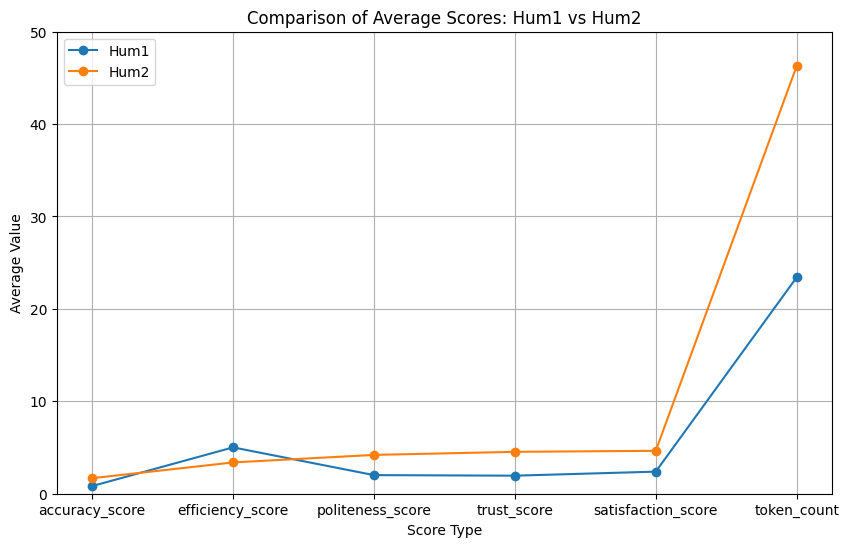

In [17]:
# Line plot comparison for Hum1 vs Hum2 scores
score_cols = ['accuracy_score','efficiency_score','politeness_score','trust_score','satisfaction_score', 'token_count']

hum1_means = hum1_df[score_cols].mean()
hum2_means = hum2_df[score_cols].mean()

plt.figure(figsize=(10,6))
plt.plot(score_cols, hum1_means, marker='o', label='Hum1')
plt.plot(score_cols, hum2_means, marker='o', label='Hum2')
plt.title('Comparison of Average Scores: Hum1 vs Hum2')
plt.xlabel('Score Type')
plt.ylabel('Average Value')
plt.ylim(0,50)
plt.grid(True)
plt.legend()
plt.show()

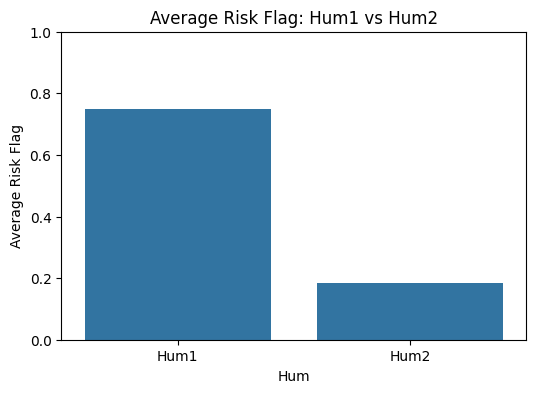

In [ ]:
#barplot for average risk_flag
risk_avg = pd.DataFrame({
    'Hum': ['Hum1','Hum2'],
    'Average Risk': [hum1_df['risk_flag'].mean(), hum2_df['risk_flag'].mean()]
})

plt.figure(figsize=(6,4))
sns.barplot(x='Hum', y='Average Risk', data=risk_avg)
plt.title('Average Risk Flag: Hum1 vs Hum2')
plt.ylabel('Average Risk Flag')
plt.ylim(0,1)
plt.show()

Step2: compare deepseek(web) 0(lengthy) & deepseek(web) 1(simplified)
               gpt-oss120b 0(lengthy) & gpt-oss120b 1(simplied)
               llama3:8b 0(lengthy) & llama3:8b 1(simplified)

In [ ]:
# Descriptive statistics for LLMs: Deep0, Deep1, Gpt0, Gpt1, Llama0, Llama1
LLM_sheets = ['Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in LLM_sheets}

numeric_cols1 = ['accuracy_score','efficiency_score','politeness_score',
                'trust_score','satisfaction_score','risk_flag','token_count']

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

for name, df in dfs.items():
    print(f"--- {name} Descriptive Statistics ---")
    stats = df[numeric_cols1].describe().transpose() 
    print(stats.to_string())
    print("\n")

--- Deep0 Descriptive Statistics ---
                    count        mean        std   min    25%    50%    75%    max
accuracy_score       27.0    2.000000   0.000000   2.0   2.00    2.0    2.0    2.0
efficiency_score     27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
politeness_score     27.0    4.370370   0.492103   4.0   4.00    4.0    5.0    5.0
trust_score          27.0    4.962963   0.192450   4.0   5.00    5.0    5.0    5.0
satisfaction_score   27.0    4.666667   0.480384   4.0   4.00    5.0    5.0    5.0
risk_flag            27.0    0.000000   0.000000   0.0   0.00    0.0    0.0    0.0
token_count          27.0  110.259259  31.283299  40.3  87.75  117.0  127.4  184.6


--- Deep1 Descriptive Statistics ---
                    count       mean       std  min    25%   50%   75%   max
accuracy_score       27.0   1.962963  0.192450  1.0   2.00   2.0   2.0   2.0
efficiency_score     27.0   4.962963  0.192450  4.0   5.00   5.0   5.0   5.0
politeness_score     27.0   4

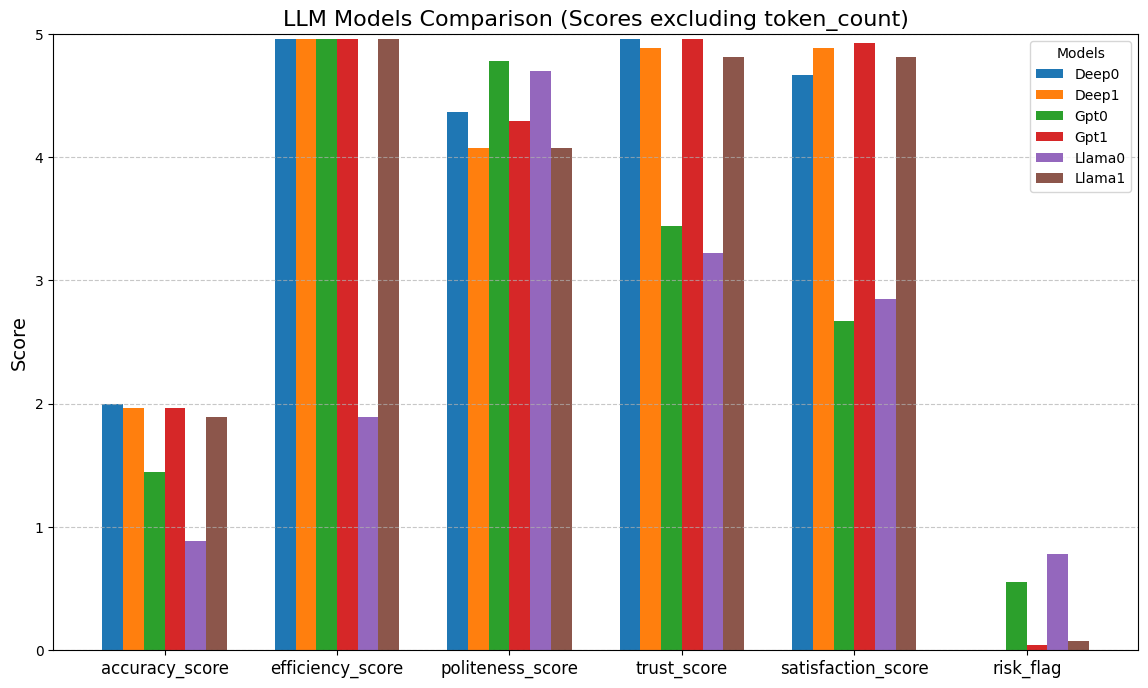

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

means_dict = {}
for name, df in dfs.items():
    temp = df[numeric_cols1].mean()
    means_dict[name] = temp  
means_df = pd.DataFrame(means_dict).T 
means_df = means_df.drop(columns=['token_count']) 

scores = means_df.columns
models = means_df.index
x = np.arange(len(scores)) 
width = 0.12  

plt.figure(figsize=(14, 8))
for i, model in enumerate(models):
    plt.bar(x + i*width, means_df.loc[model], width=width, label=model)

plt.xticks(x + width*(len(models)/2 - 0.5), scores, fontsize=12)
plt.ylim(0, 5)
plt.ylabel("Score", fontsize=14)
plt.title("LLM Models Comparison (Scores excluding token_count)", fontsize=16)
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

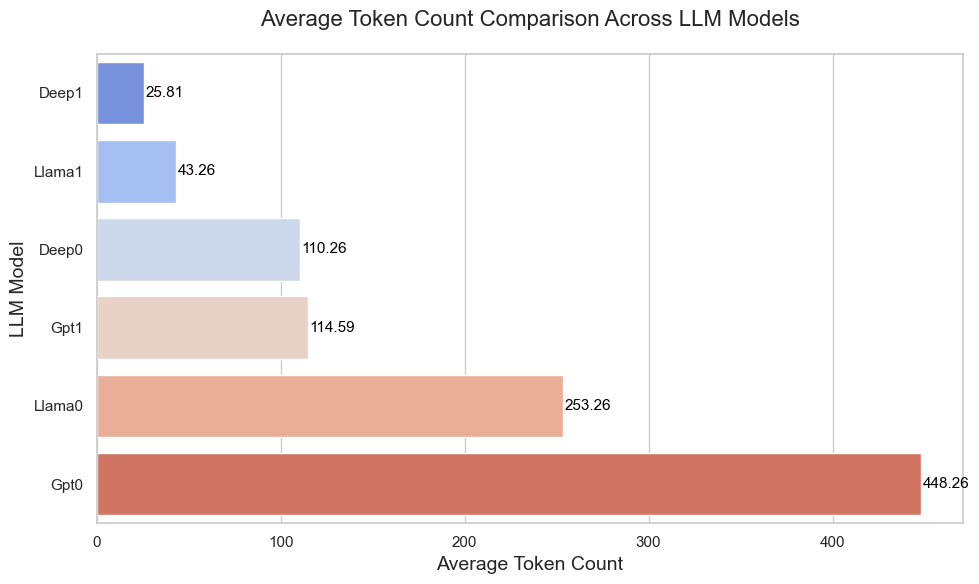

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

token_means = {name: df['token_count'].mean() for name, df in dfs.items()}
token_df = pd.DataFrame(list(token_means.items()), columns=['Model', 'Average_Token_Count'])
token_df = token_df.sort_values(by='Average_Token_Count', ascending=True)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

barplot = sns.barplot(
    data=token_df,
    x='Average_Token_Count',
    y='Model',
    hue='Model',         
    palette='coolwarm',
    legend=False         
)

for index, value in enumerate(token_df['Average_Token_Count']):
    plt.text(value + 1, index, f"{value:.2f}", va='center', fontsize=11, color='black')

plt.title("Average Token Count Comparison Across LLM Models", fontsize=16, pad=20)
plt.xlabel("Average Token Count", fontsize=14)
plt.ylabel("LLM Model", fontsize=14)

plt.tight_layout()
plt.show()

Step3: Compare Hum1&2 and LLMs Accuracy

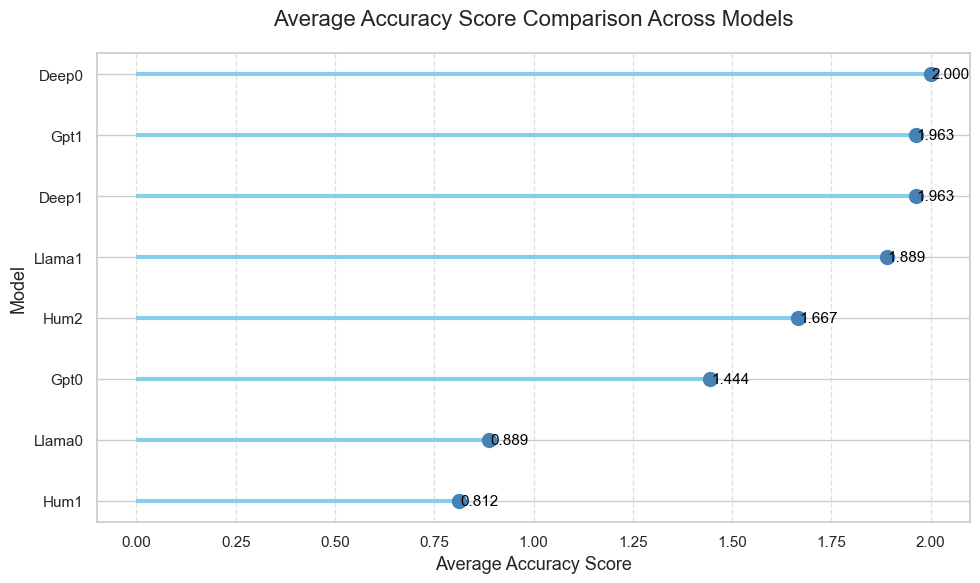

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets = ['Hum1', 'Hum2', 'Deep0', 'Deep1', 'Gpt0', 'Gpt1', 'Llama0', 'Llama1']

dfs1 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets}

hum1_df = dfs1['Hum1']
hum1_df['accuracy_score'] = hum1_df['accuracy_score'].fillna(hum1_df['accuracy_score'].mean())
dfs1['Hum1'] = hum1_df

mean_accuracy = {name: df['accuracy_score'].mean() for name, df in dfs1.items()}

acc_df = pd.DataFrame(list(mean_accuracy.items()), columns=['Model', 'Average_Accuracy'])
acc_df = acc_df.sort_values(by='Average_Accuracy', ascending=True)

# Lollipop plot
plt.figure(figsize=(10, 6))
plt.hlines(y=acc_df['Model'], xmin=0, xmax=acc_df['Average_Accuracy'], color='skyblue', linewidth=3)
plt.plot(acc_df['Average_Accuracy'], acc_df['Model'], "o", markersize=10, color='steelblue')

for index, value in enumerate(acc_df['Average_Accuracy']):
    plt.text(value + 0.002, index, f"{value:.3f}", va='center', fontsize=11, color='black')

plt.title("Average Accuracy Score Comparison Across Models", fontsize=16, pad=20)
plt.xlabel("Average Accuracy Score", fontsize=13)
plt.ylabel("Model", fontsize=13)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Step3: compare Hum1&Hum2 and LLMs Efficiency & Token

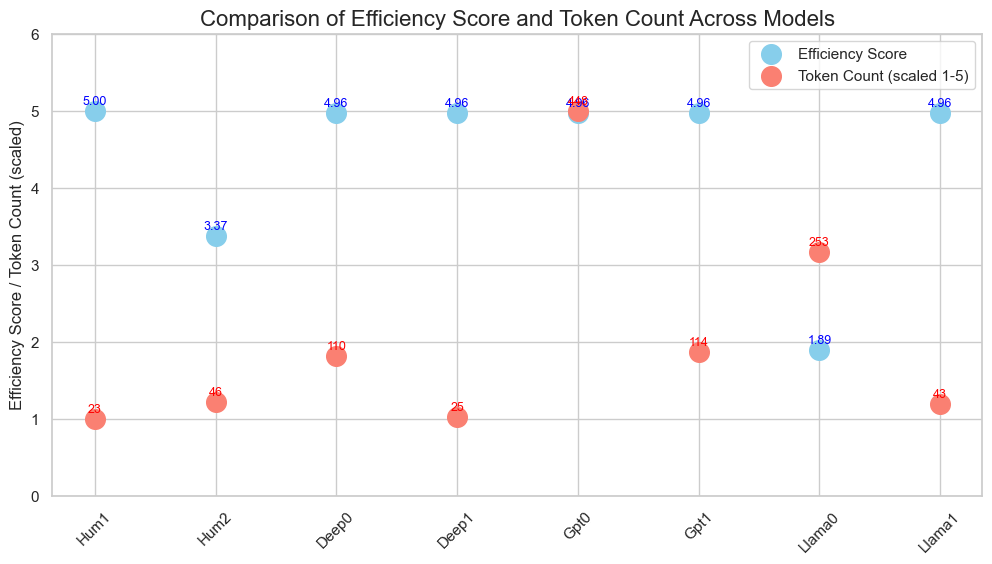

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets2= ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs2 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets2}

numeric_cols2 = ['efficiency_score','token_count']

dfs2['Hum1'][numeric_cols2] = dfs2['Hum1'][numeric_cols2].fillna(dfs2['Hum1'][numeric_cols2].mean())

means = {}
for name, df in dfs2.items():
    means[name] = df[numeric_cols2].mean()

means_df = pd.DataFrame(means).T.reset_index()
means_df = means_df.rename(columns={'index':'Model'})

token_min = means_df['token_count'].min()
token_max = means_df['token_count'].max()
means_df['token_count_scaled'] = 1 + 4*(means_df['token_count'] - token_min)/(token_max - token_min)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.scatter(means_df['Model'], means_df['efficiency_score'], s=200, color='skyblue', label='Efficiency Score')
plt.scatter(means_df['Model'], means_df['token_count_scaled'], s=200, color='salmon', label='Token Count (scaled 1-5)')

for i, row in means_df.iterrows():
    plt.text(row['Model'], row['efficiency_score']+0.05, f"{row['efficiency_score']:.2f}", 
             ha='center', va='bottom', fontsize=9, color='blue')
    plt.text(row['Model'], row['token_count_scaled']+0.05, f"{int(row['token_count'])}", 
             ha='center', va='bottom', fontsize=9, color='red')

plt.ylim(0,6)
plt.ylabel("Efficiency Score / Token Count (scaled)")
plt.title("Comparison of Efficiency Score and Token Count Across Models", fontsize=16)
plt.legend()
plt.xticks(rotation=45)
plt.show()

Step4:Compare Politeness of 2 human agents and 6 LLMs

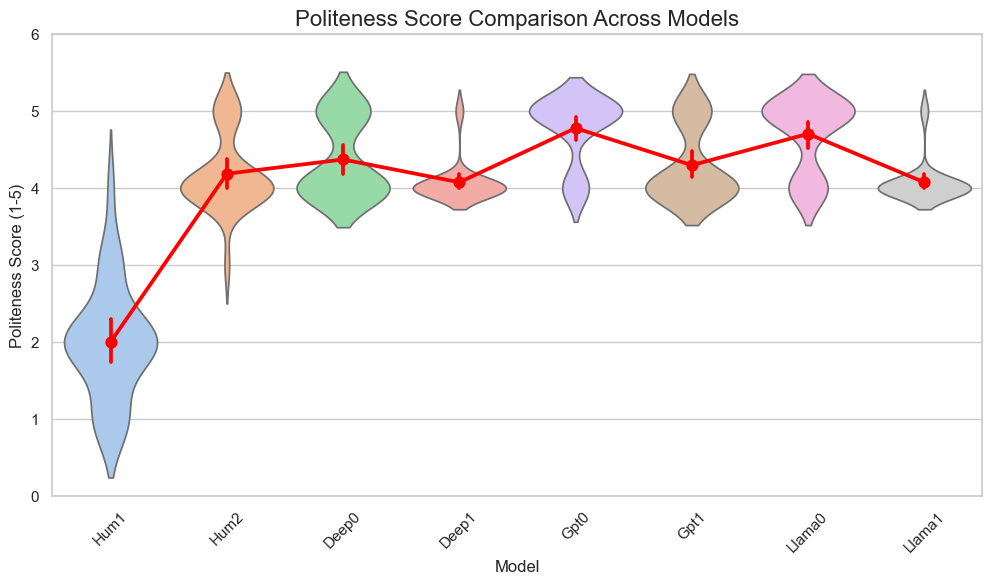

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"

sheets3 = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs3 = {sheet: pd.read_excel(file_path, sheet_name=sheet) for sheet in sheets3}

dfs3['Hum1']['politeness_score'] = dfs3['Hum1']['politeness_score'].fillna(dfs3['Hum1']['politeness_score'].mean())

politeness_data = []
for name, df in dfs3.items():
    temp = df[['politeness_score']].copy()
    temp['Model'] = name
    politeness_data.append(temp)

politeness_df = pd.concat(politeness_data, ignore_index=True)

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

# Violin plot 
sns.violinplot(x='Model', y='politeness_score', data=politeness_df, inner=None, palette='pastel', hue='Model', legend=False)
sns.pointplot(x='Model', y='politeness_score', data=politeness_df, estimator=np.mean, color='red', markers='o')

plt.title("Politeness Score Comparison Across Models", fontsize=16)
plt.ylabel("Politeness Score (1-5)")
plt.ylim(0,6)
plt.xticks(rotation=45)
plt.show()


Step5: Research on how trust_score is affected by politeness_score, and accuracy_score in Hum1
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in Hum1

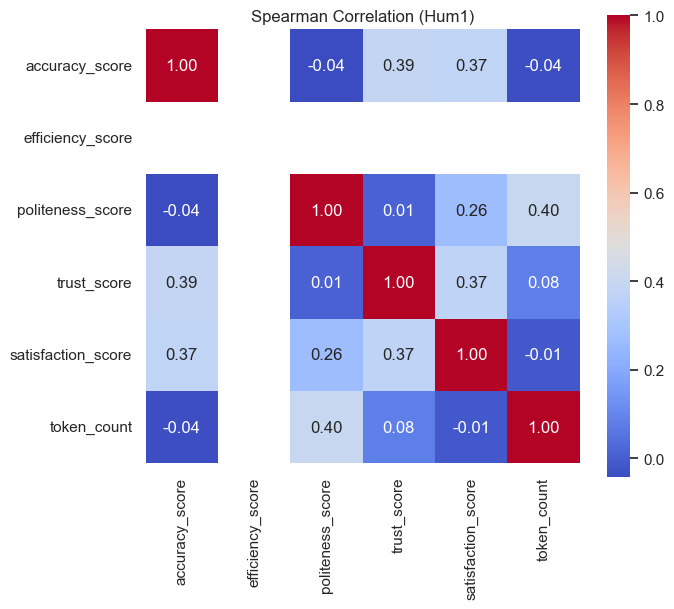

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df4 = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score',
        'trust_score', 'satisfaction_score', 'token_count']

df_num = df4[cols].copy()
df_num = df_num.fillna(df_num.mean(numeric_only=True))
corr_spearman = df_num.corr(method='spearman')

plt.figure(figsize=(7,6))
sns.set(style="white")
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation (Hum1)")
plt.show()

In [16]:

X_vif = df_num.drop(columns=['trust_score']).copy()
X_vif = X_vif.assign(const=1)  

try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    statsmodels_available = True
except ImportError:
    statsmodels_available = False

if statsmodels_available:
    vif_data = pd.DataFrame()
    vif_data['feature'] = X_vif.columns
    vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    print("VIF (including const):\n", vif_data)
else:
    print("statsmodels not available -> cannot compute VIF. Install statsmodels with 'pip install statsmodels'")

VIF (including const):
               feature       VIF
0      accuracy_score  1.618845
1    efficiency_score  0.000000
2    politeness_score  1.561307
3  satisfaction_score  1.985878
4         token_count  1.467222
5               const  0.000000


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [17]:
#linear regression
# baseline cross-validated R^2 (no scaling)
X = df_num[['accuracy_score','politeness_score','satisfaction_score','token_count']].copy()
y = df_num['trust_score'].copy()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
lr = LinearRegression()
cv_r2 = cross_val_score(lr, X, y, cv=kf, scoring='r2')
print("LinearRegression CV R2 (no scaling):", cv_r2, "mean:", np.mean(cv_r2))

LinearRegression CV R2 (no scaling): [ 0.30250584  0.52881719 -0.78144255  0.         -1.63832366] mean: -0.31768863618945564


In [ ]:
# Ridge regression for different alpha values, evaluate with CV
alphas = [0.01, 0.1, 1, 10, 100]
for a in alphas:
    model = make_pipeline(StandardScaler(), Ridge(alpha=a, random_state=42))
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"Ridge alpha={a} CV R2:", scores, "mean:", np.mean(scores))


Ridge alpha=0.01 CV R2: [ 0.30285674  0.52823605 -0.77989966  1.         -1.6383884 ] mean: -0.11743905488757474
Ridge alpha=0.1 CV R2: [ 0.30590199  0.52308012 -0.76631738  1.         -1.63884963] mean: -0.11523698137888072
Ridge alpha=1 CV R2: [ 0.32738197  0.47823547 -0.65464414  1.         -1.63248063] mean: -0.09630146644251196
Ridge alpha=10 CV R2: [ 0.31113048  0.29541143 -0.28379746  1.         -1.18293504] mean: 0.027961881261048437
Ridge alpha=100 CV R2: [ 0.05709143  0.04702705 -0.43282926  1.         -0.06868587] mean: 0.12052067088945126



Final model fitted on full data (StandardScaler + LinearRegression):
R2 on training (full data): 0.6251139015520502
RMSE on training (full data): 0.42383124256356564
  accuracy_score: -0.2103
  politeness_score: -0.0374
  satisfaction_score: 0.6686
  token_count: 0.1569
Intercept (on scaled features): 1.9375


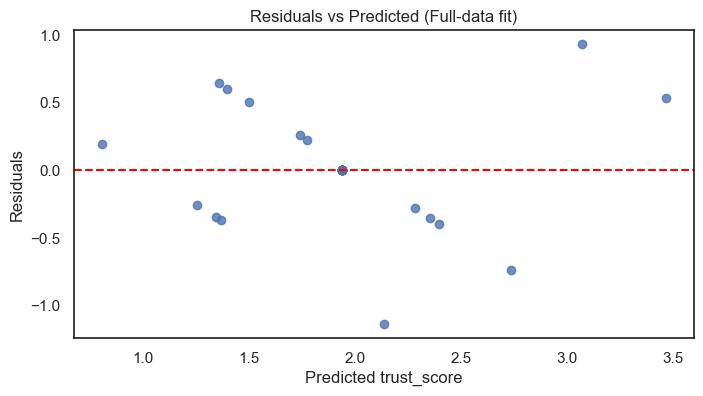

In [ ]:
# fit final pipeline on full data, show coefficients, R2, RMSE, and residual plot
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X, y)
y_pred = pipe.predict(X)

print("\nFinal model fitted on full data (StandardScaler + LinearRegression):")
print("R2 on training (full data):", r2_score(y, y_pred))
print("RMSE on training (full data):", np.sqrt(mean_squared_error(y, y_pred)))

coefs = pipe.named_steps['linearregression'].coef_
intercept = pipe.named_steps['linearregression'].intercept_
for feat, c in zip(X.columns, coefs):
    print(f"  {feat}: {c:.4f}")
print("Intercept (on scaled features):", intercept)

residuals = y - y_pred
plt.figure(figsize=(8,4))
plt.scatter(y_pred, residuals, alpha=0.8)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted trust_score")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Full-data fit)")
plt.show()


In [ ]:
# ordered logistic regression
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df6 = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['trust_score', 'accuracy_score', 'politeness_score']
df6 = df6[cols].copy()
df6 = df6.fillna(df6.mean(numeric_only=True))

X = df6[['accuracy_score', 'politeness_score']]
y = df6['trust_score']

model = OrderedModel(y, X, distr='logit')
res = model.fit(method='bfgs')
print(res.summary())

Optimization terminated successfully.
         Current function value: 1.191094
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
                             OrderedModel Results                             
Dep. Variable:            trust_score   Log-Likelihood:                -32.160
Model:                   OrderedModel   AIC:                             74.32
Method:            Maximum Likelihood   BIC:                             80.80
Date:                Sat, 01 Nov 2025                                         
Time:                        17:00:36                                         
No. Observations:                  27                                         
Df Residuals:                      22                                         
Df Model:                           2                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------

In [ ]:
import pandas as pd
import pingouin as pg

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

pcorr_accuracy = pg.partial_corr(data=df_num, x='satisfaction_score', y='accuracy_score',
                                 covar=['politeness_score','efficiency_score'], method='pearson')
print("Partial correlation (satisfaction_score vs accuracy_score):\n", pcorr_accuracy, "\n")

pcorr_politeness = pg.partial_corr(data=df_num, x='satisfaction_score', y='politeness_score',
                                   covar=['accuracy_score','efficiency_score'], method='pearson')
print("Partial correlation (satisfaction_score vs politeness_score):\n", pcorr_politeness, "\n")

pcorr_efficiency = pg.partial_corr(data=df_num, x='satisfaction_score', y='efficiency_score',
                                   covar=['accuracy_score','politeness_score'], method='pearson')
print("Partial correlation (satisfaction_score vs efficiency_score):\n", pcorr_efficiency)

Partial correlation (satisfaction_score vs accuracy_score):
           n         r        CI95%     p-val
pearson  27  0.593957  [0.26, 0.8]  0.001746 

Partial correlation (satisfaction_score vs politeness_score):
           n         r          CI95%     p-val
pearson  27  0.321319  [-0.08, 0.64]  0.117301 

Partial correlation (satisfaction_score vs efficiency_score):
           n         r           CI95%     p-val
pearson  27 -0.675951  [-0.85, -0.38]  0.000208


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:866: RuntimeWarning: divide by zero encountered in divide
  D = np.diag(np.sqrt(1 / Vi_diag))
c:\Users\grace\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:867: RuntimeWarning: invalid value encountered in matmul
  pcor = -1 * (D @ Vi @ D)  # Partial correlation matrix


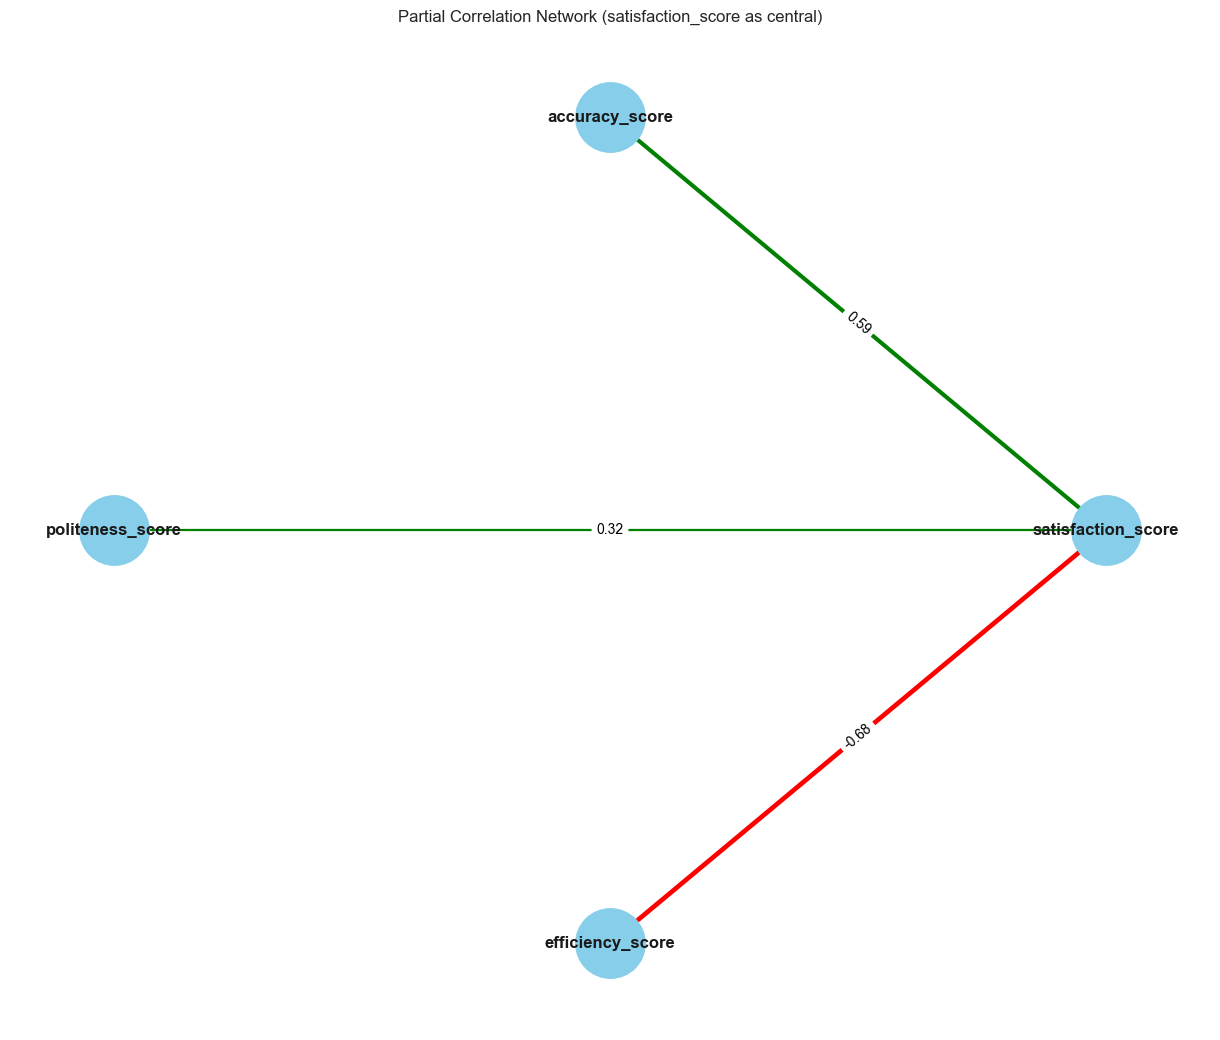

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pingouin as pg

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum1')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
df_num = df[cols].copy()
df_num = df_num.fillna(df_num.mean(numeric_only=True))

pcorr_accuracy = pg.partial_corr(data=df_num, x='satisfaction_score', y='accuracy_score',
                                 covar=['politeness_score','efficiency_score'], method='pearson')
pcorr_politeness = pg.partial_corr(data=df_num, x='satisfaction_score', y='politeness_score',
                                   covar=['accuracy_score','efficiency_score'], method='pearson')
pcorr_efficiency = pg.partial_corr(data=df_num, x='satisfaction_score', y='efficiency_score',
                                   covar=['accuracy_score','politeness_score'], method='pearson')

edges = [
    ('satisfaction_score', 'accuracy_score', pcorr_accuracy['r'].values[0]),
    ('satisfaction_score', 'politeness_score', pcorr_politeness['r'].values[0]),
    ('satisfaction_score', 'efficiency_score', pcorr_efficiency['r'].values[0])
]

G = nx.Graph()
for u, v, w in edges:
    G.add_edge(u, v, weight=w)

pos = nx.circular_layout(G)
weights = [abs(G[u][v]['weight'])*5 for u,v in G.edges()]  
colors = ['green' if G[u][v]['weight']>0 else 'red' for u,v in G.edges()]  # positive=green, negative=red

plt.figure(figsize=(12,10))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='skyblue', 
        width=weights, edge_color=colors, font_size=12, font_weight='bold')

edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)

plt.title("Partial Correlation Network (satisfaction_score as central)", fontsize=12)
plt.show()

Step6: Research on how trust_score is affected by politeness_score, and accuracy_score in Hum2
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in Hum2

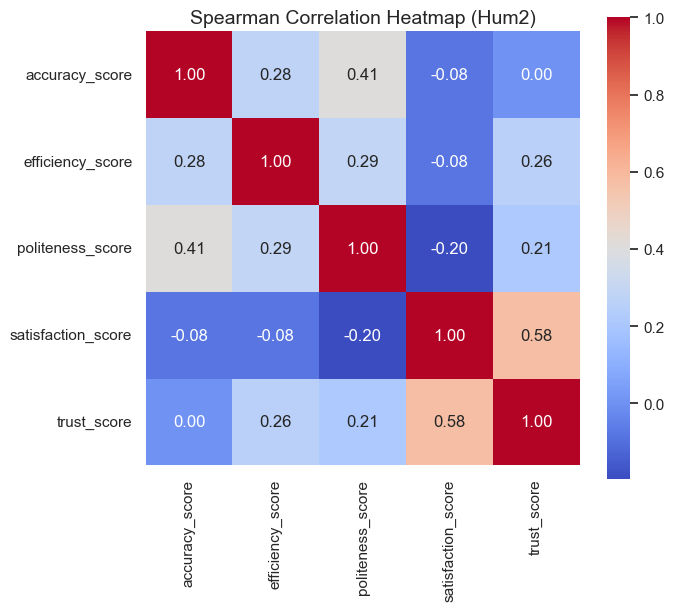

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum2')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score', 'trust_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

# Compute Spearman correlation matrix
corr_matrix = df_num.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Spearman Correlation Heatmap (Hum2)", fontsize=14)
plt.show()


In [ ]:
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

file_path = r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm"
df = pd.read_excel(file_path, sheet_name='Hum2')

cols = ['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score', 'trust_score']
df_num = df[cols].copy()

df_num = df_num.fillna(df_num.mean(numeric_only=True))

X = df_num[['accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']]
y = df_num['trust_score']

model = OrderedModel(y, X, distr='logit')
result = model.fit(method='bfgs')

print(result.summary())

pred_probs = result.predict()
print(pred_probs[:5])

Optimization terminated successfully.
         Current function value: 0.344870
         Iterations: 50
         Function evaluations: 53
         Gradient evaluations: 53
                             OrderedModel Results                             
Dep. Variable:            trust_score   Log-Likelihood:                -9.3115
Model:                   OrderedModel   AIC:                             28.62
Method:            Maximum Likelihood   BIC:                             35.10
Date:                Sat, 01 Nov 2025                                         
Time:                        17:53:19                                         
No. Observations:                  27                                         
Df Residuals:                      22                                         
Df Model:                           4                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------

In [40]:
import pingouin as pg
import pandas as pd
xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

pcorr_accuracy = pg.partial_corr(data=Hum2,
                                  x='trust_score',
                                  y='accuracy_score',
                                  covar=['efficiency_score', 'politeness_score', 'satisfaction_score'],
                                  method='pearson')
print("Partial correlation (trust_score vs accuracy_score):\n", pcorr_accuracy)

pcorr_efficiency = pg.partial_corr(data=Hum2,
                                   x='trust_score',
                                   y='efficiency_score',
                                   covar=['accuracy_score', 'politeness_score', 'satisfaction_score'],
                                   method='pearson')
print("\nPartial correlation (trust_score vs efficiency_score):\n", pcorr_efficiency)

pcorr_politeness = pg.partial_corr(data=Hum2,
                                   x='trust_score',
                                   y='politeness_score',
                                   covar=['accuracy_score', 'efficiency_score', 'satisfaction_score'],
                                   method='pearson')
print("\nPartial correlation (trust_score vs politeness_score):\n", pcorr_politeness)

pcorr_satisfaction = pg.partial_corr(data=Hum2,
                                     x='trust_score',
                                     y='satisfaction_score',
                                     covar=['accuracy_score', 'efficiency_score', 'politeness_score'],
                                     method='pearson')
print("\nPartial correlation (trust_score vs satisfaction_score):\n", pcorr_satisfaction)


Partial correlation (trust_score vs accuracy_score):
           n         r          CI95%     p-val
pearson  27 -0.274749  [-0.61, 0.14]  0.193838

Partial correlation (trust_score vs efficiency_score):
           n         r          CI95%     p-val
pearson  27  0.249248  [-0.17, 0.59]  0.240183

Partial correlation (trust_score vs politeness_score):
           n         r       CI95%     p-val
pearson  27  0.405752  [0.0, 0.7]  0.049158

Partial correlation (trust_score vs satisfaction_score):
           n         r         CI95%    p-val
pearson  27  0.647222  [0.33, 0.83]  0.00063


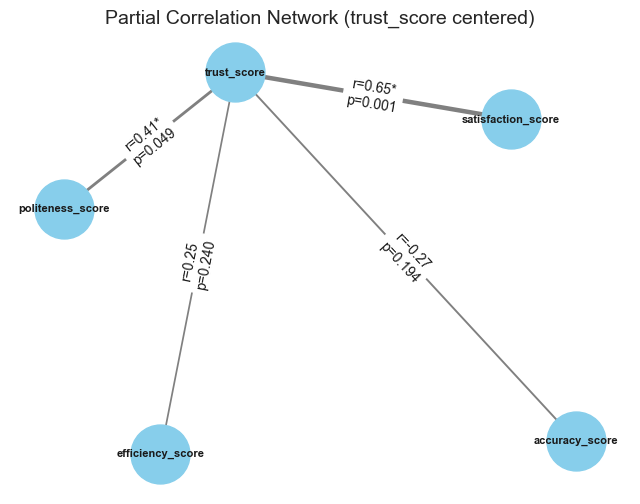

In [45]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

variables = ['trust_score', 'accuracy_score', 'efficiency_score', 'politeness_score', 'satisfaction_score']
pcorr_results = {}

for var in variables:
    if var == 'trust_score':
        continue
    covars = [v for v in variables if v not in ['trust_score', var]]
    result = pg.partial_corr(data=Hum2, x='trust_score', y=var, covar=covars, method='pearson')
    pcorr_results[var] = {'r': result['r'].values[0], 'p-val': result['p-val'].values[0]}

G = nx.Graph()
G.add_node('trust_score')
for var in pcorr_results:
    G.add_node(var)
    r = pcorr_results[var]['r']
    G.add_edge('trust_score', var, weight=r)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42, k=1.5)

nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=1800)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

edges = G.edges(data=True)
edge_labels = {}
for u, v, d in edges:
    r = d['weight']
    p = pcorr_results[v]['p-val'] if u == 'trust_score' else pcorr_results[u]['p-val']
    significance = '*' if p < 0.05 else ''
    edge_labels[(u, v)] = f"r={r:.2f}{significance}\np={p:.3f}"

nx.draw_networkx_edges(G, pos, width=[abs(d['weight'])*5 for _, _, d in edges], edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

plt.title("Partial Correlation Network (trust_score centered)", fontsize=14)
plt.axis('off')
plt.show()

Partial correlation (satisfaction_score vs accuracy_score):
           n         r          CI95%     p-val
pearson  27  0.209764  [-0.21, 0.57]  0.325228
Partial correlation (satisfaction_score vs efficiency_score):
           n         r          CI95%     p-val
pearson  27 -0.209799  [-0.57, 0.21]  0.325144
Partial correlation (satisfaction_score vs trust_score):
           n         r         CI95%    p-val
pearson  27  0.647222  [0.33, 0.83]  0.00063
Partial correlation (satisfaction_score vs politeness_score):
           n       r          CI95%     p-val
pearson  27 -0.3659  [-0.67, 0.04]  0.078678


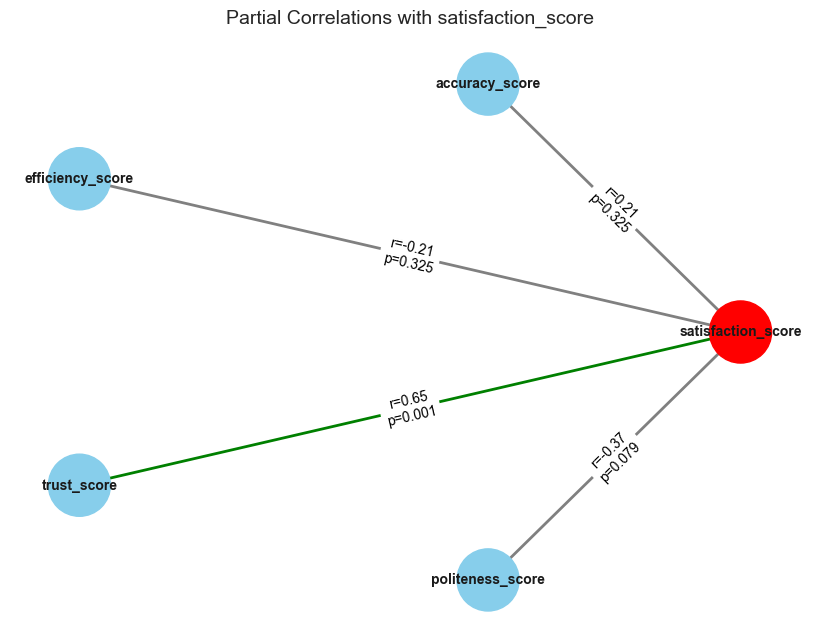

In [ ]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile('C:\\Users\\grace\\VisualStudioProject\\Thesis\\data.xlsm')
Hum2 = pd.read_excel(xls, sheet_name='Hum2')

variables = ['accuracy_score', 'efficiency_score', 'trust_score', 'politeness_score']

pcorr_results = []
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=Hum2, x='satisfaction_score', y=var, covar=covars, method='pearson')
    pcorr_results.append(pcorr)
    print(f"Partial correlation (satisfaction_score vs {var}):\n", pcorr)

G = nx.Graph()
G.add_node('satisfaction_score', color='red')

for i, var in enumerate(variables):
    r = pcorr_results[i]['r'].values[0]
    p = pcorr_results[i]['p-val'].values[0]
    label = f"r={r:.2f}\np={p:.3f}"
    if p < 0.05:
        edge_color = 'green' 
    else:
        edge_color = 'gray'  
    G.add_node(var, color='skyblue')
    G.add_edge('satisfaction_score', var, weight=abs(r), label=label, color=edge_color)

pos = nx.circular_layout(G)
edge_colors = [G[u][v]['color'] for u,v in G.edges()]
edge_labels = nx.get_edge_attributes(G,'label')
node_colors = [G.nodes[n]['color'] for n in G.nodes()]

plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, font_weight='bold', edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.title("Partial Correlations with satisfaction_score", fontsize=14)
plt.show()

Step7: Research on how trust_score is affected by politeness_score, and accuracy_score in all models
                       satisfaction_score is affected by accuracy_score, politeness_score, efficiency_score in all models

In [ ]:
import pandas as pd

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')

sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']

dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']

for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)

dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

desc_stats = combined_df.describe(include='all')
print(desc_stats)

        question_id                                      question_text  \
count    216.000000                                                216   
unique          NaN                                                 27   
top             NaN  Can I apply for a credit card as a master stud...   
freq            NaN                                                  8   
mean      14.000000                                                NaN   
std        7.806974                                                NaN   
min        1.000000                                                NaN   
25%        7.000000                                                NaN   
50%       14.000000                                                NaN   
75%       21.000000                                                NaN   
max       27.000000                                                NaN   

        accuracy_score  efficiency_score  politeness_score  trust_score  \
count       216.000000        216.00

In [50]:
import pingouin as pg
import pandas as pd

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')
sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']
for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)
dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

covariates = ['accuracy_score', 'efficiency_score', 'politeness_score', 
              'satisfaction_score', 'token_count', 'risk_flag']

for var in covariates:
    other_covars = [v for v in covariates if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='trust_score',
                            y=var,
                            covar=other_covars,
                            method='pearson')
    print(f"Partial correlation (trust_score vs {var}):\n", pcorr, "\n")


Partial correlation (trust_score vs accuracy_score):
            n         r         CI95%     p-val
pearson  216  0.147985  [0.01, 0.28]  0.031659 

Partial correlation (trust_score vs efficiency_score):
            n         r          CI95%     p-val
pearson  216  0.023961  [-0.11, 0.16]  0.729316 

Partial correlation (trust_score vs politeness_score):
            n         r         CI95%     p-val
pearson  216  0.307952  [0.18, 0.43]  0.000005 

Partial correlation (trust_score vs satisfaction_score):
            n         r         CI95%         p-val
pearson  216  0.577952  [0.48, 0.66]  3.361689e-20 

Partial correlation (trust_score vs token_count):
            n         r          CI95%     p-val
pearson  216  0.060579  [-0.08, 0.19]  0.381282 

Partial correlation (trust_score vs risk_flag):
            n         r           CI95%     p-val
pearson  216 -0.243647  [-0.37, -0.11]  0.000354 



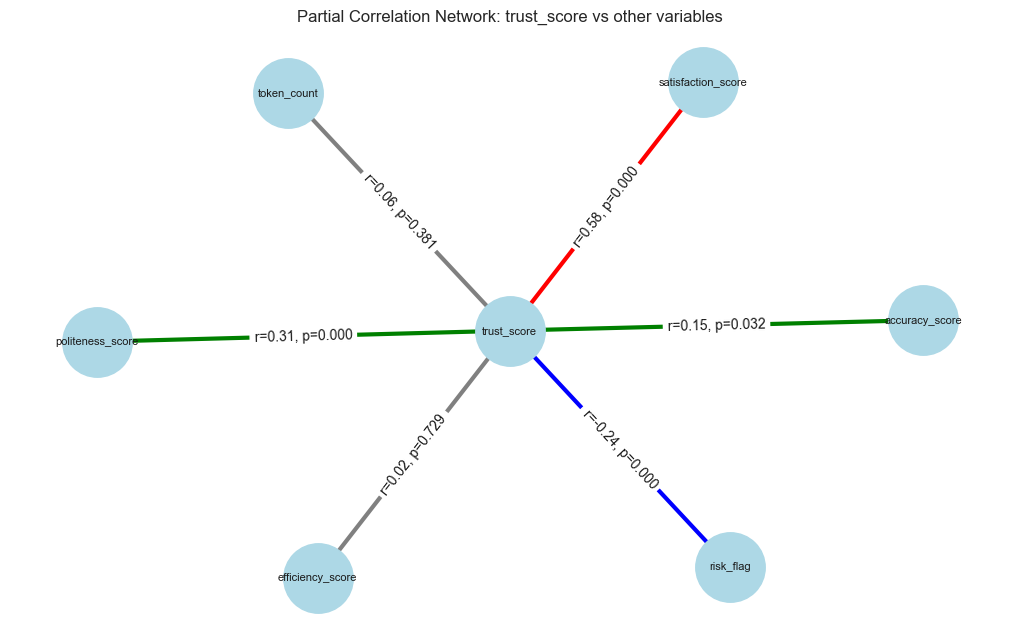

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import pingouin as pg

variables = ['accuracy_score', 'efficiency_score', 'politeness_score', 
             'satisfaction_score', 'token_count', 'risk_flag']

pcorr_results = {}
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='trust_score',
                            y=var,
                            covar=covars,
                            method='pearson')
    pcorr_results[var] = pcorr.iloc[0] 

# Create network graph
G = nx.Graph()
G.add_node('trust_score')

for var, res in pcorr_results.items():
    r = res['r']
    p = res['p-val']
    # Edge color based on significance and effect size
    if p < 0.05:
        if r >= 0.5:
            color = 'red'          # strong positive
        elif r <= -0.2:
            color = 'blue'         # strong negative
        else:
            color = 'green'      # moderate significant
    else:
        color = 'gray'             # non-significant
    label = f"r={r:.2f}, p={p:.3f}"
    G.add_node(var)
    G.add_edge('trust_score', var, color=color, label=label)

pos = nx.spring_layout(G, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue',
        edge_color=colors, width=3, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title('Partial Correlation Network: trust_score vs other variables')
plt.show()


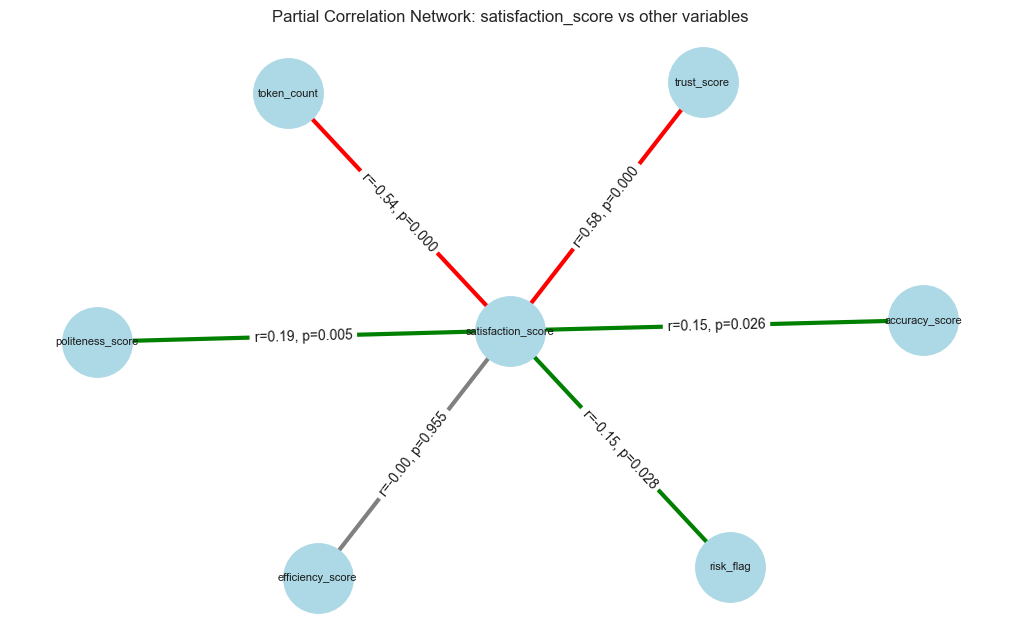

In [ ]:
import pandas as pd
import pingouin as pg
import networkx as nx
import matplotlib.pyplot as plt

xls = pd.ExcelFile(r'C:\Users\grace\VisualStudioProject\Thesis\data.xlsm')
sheet_names = ['Hum1','Hum2','Deep0','Deep1','Gpt0','Gpt1','Llama0','Llama1']
dfs = {name: pd.read_excel(xls, sheet_name=name) for name in sheet_names}

hum1 = dfs['Hum1'].copy()
mask = hum1['question_id'].between(17,27)
cols_to_fill = ['accuracy_score', 'efficiency_score', 'politeness_score', 
                'trust_score', 'satisfaction_score', 'risk_flag', 'token_count']
for col in cols_to_fill:
    mean_value = hum1[col].mean(skipna=True)
    hum1.loc[mask, col] = hum1.loc[mask, col].fillna(mean_value)
dfs['Hum1'] = hum1

combined_df = pd.concat([dfs[name] for name in sheet_names], ignore_index=True)

variables = ['accuracy_score', 'efficiency_score', 'politeness_score', 
             'trust_score', 'token_count', 'risk_flag']

pcorr_results = {}
for var in variables:
    covars = [v for v in variables if v != var]
    pcorr = pg.partial_corr(data=combined_df,
                            x='satisfaction_score',
                            y=var,
                            covar=covars,
                            method='pearson')
    pcorr_results[var] = pcorr.iloc[0]

G = nx.Graph()
G.add_node('satisfaction_score')

for var, res in pcorr_results.items():
    r = res['r']
    p = res['p-val']
    # Edge color based on significance and effect size
    if p < 0.05:
        if abs(r) >= 0.5:
            color = 'red'          # strong positive/negative
        else:
            color = 'green'        # moderate significant
    else:
        color = 'gray'             # non-significant
    label = f"r={r:.2f}, p={p:.3f}"
    G.add_node(var)
    G.add_edge('satisfaction_score', var, color=color, label=label)

pos = nx.spring_layout(G, seed=42)
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_size=2500, node_color='lightblue',
        edge_color=colors, width=3, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
plt.title('Partial Correlation Network: satisfaction_score vs other variables')
plt.show()


Step8: word frequency, n-gram, sentiment analysis, pca for Hum_text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('credit', 7), ('card', 6), ('provide', 5), ('need', 5), ('information', 5), ('meeting', 4), ('customer', 3), ('case', 3), ('chat', 3), ('latvia', 3), ('book', 3), ('individual', 3), ('read', 3), ('cards', 2), ('become', 2), ('first', 2), ('account', 2), ('opening', 2), ('application', 2), ('decision', 2)]


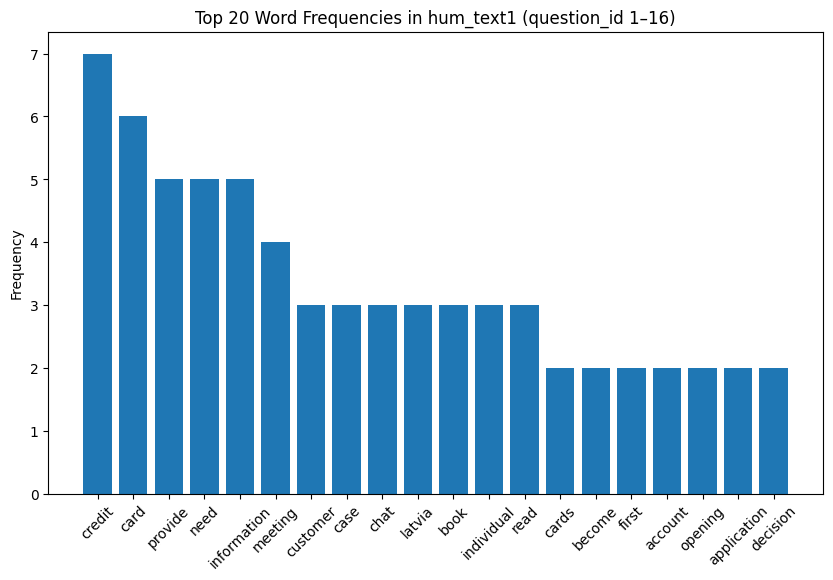

In [ ]:
#Hum_text1  word frequency analysis
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 16)]

texts = df_filtered['hum_text1'].dropna().astype(str)

import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]  
    return tokens

all_tokens = []
for t in texts:
    all_tokens.extend(clean_text(t))

word_freq = Counter(all_tokens)

print(word_freq.most_common(20))

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title("Top 20 Word Frequencies in hum_text1 (question_id 1–16)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

Top 20 Bigrams:
credit card : 5
chat provide : 3
book meeting : 3
credit cards : 2
become customer : 2
need book : 2
provide general : 2
general information : 2
read httpswwwseblvenprivatecardsmasstandardcreditcard : 2
purchases made : 2
case individual : 2
provide credit : 1
cards clients : 1
clients need : 1
need become : 1
customer first : 1
first apply : 1
apply account : 1
account opening : 1
opening case : 1

Top 20 Trigrams:
need book meeting : 2
chat provide general : 2
provide general information : 2
provide credit cards : 1
credit cards clients : 1
cards clients need : 1
clients need become : 1
need become customer : 1
become customer first : 1
customer first apply : 1
first apply account : 1
apply account opening : 1
account opening case : 1
opening case credit : 1
case credit card : 1
credit card application : 1
card application evaluated : 1
application evaluated individually : 1
evaluated individually chat : 1
individually chat provide : 1

Top 20 Four-grams:
chat provide

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


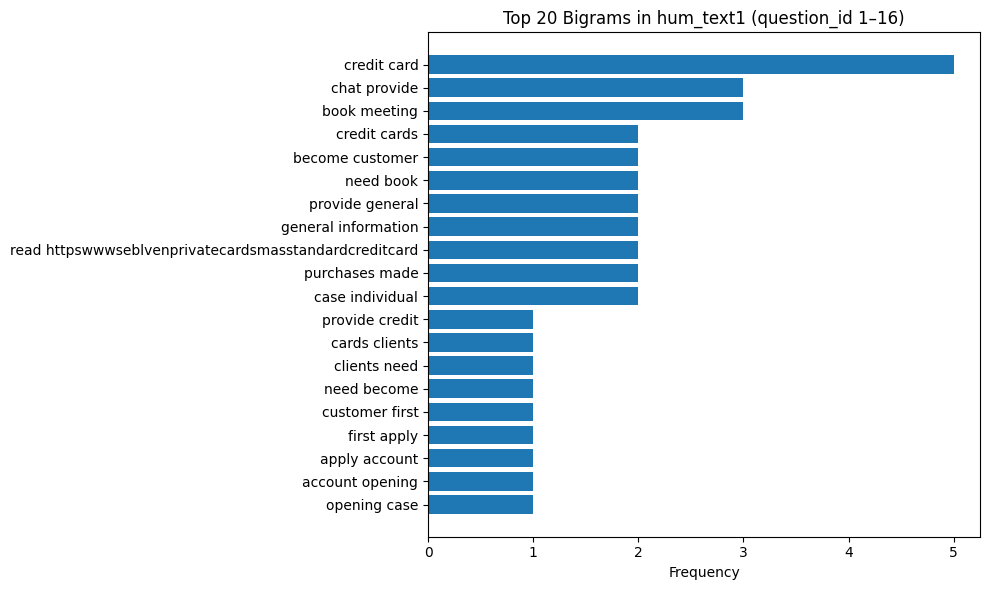

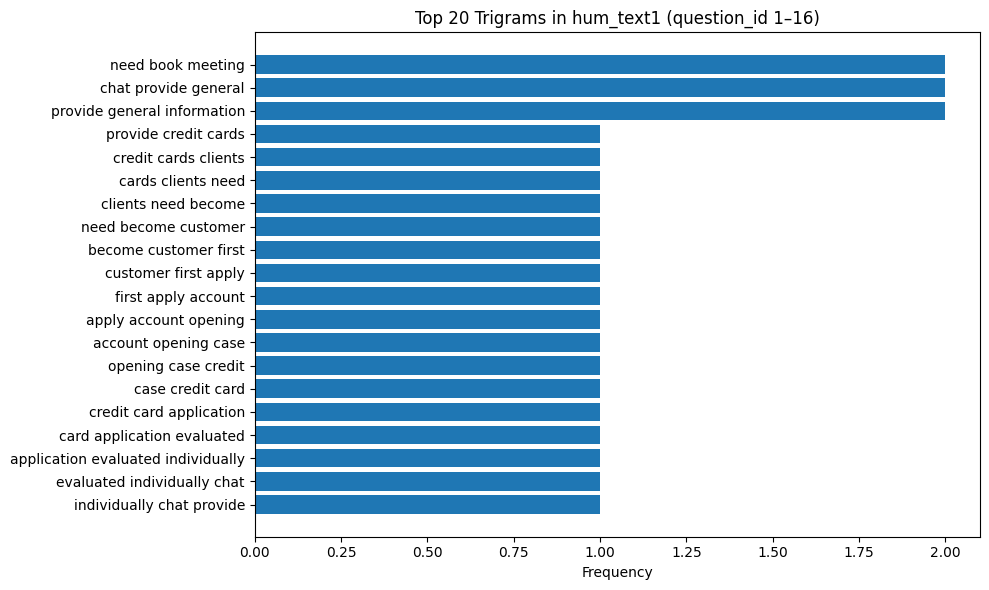

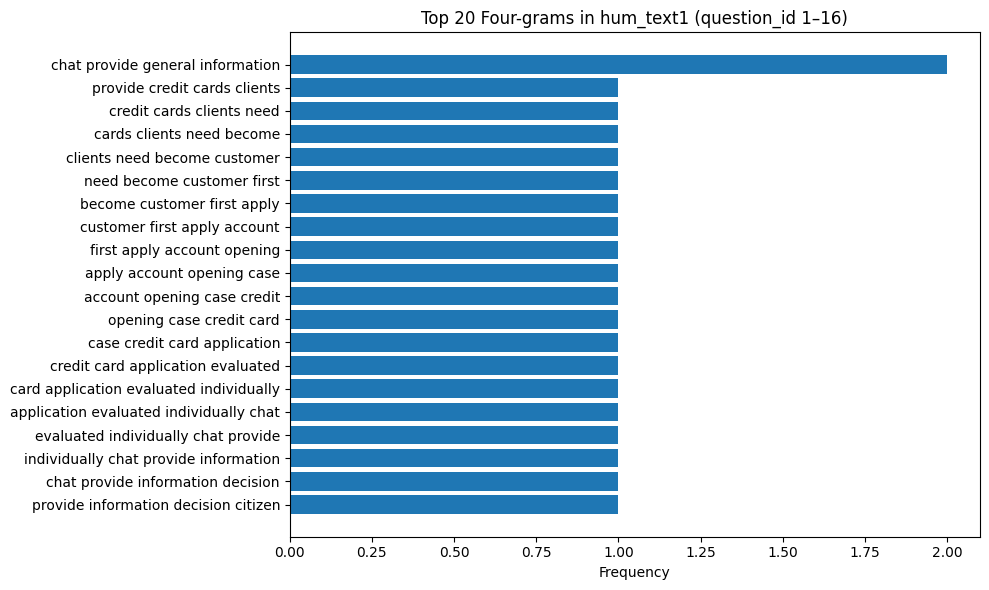

In [ ]:
#n-gram analysis
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 16)]

texts = df_filtered['hum_text1'].dropna().astype(str)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words] 
    return tokens

all_tokens = []
for t in texts:
    all_tokens.extend(clean_text(t))

def get_top_ngrams(tokens, n=2, top_k=20):
    n_grams = ngrams(tokens, n)
    freq = Counter(n_grams)
    return freq.most_common(top_k)

top_bigrams = get_top_ngrams(all_tokens, n=2)
top_trigrams = get_top_ngrams(all_tokens, n=3)
top_fourgrams = get_top_ngrams(all_tokens, n=4)

print("Top 20 Bigrams:")
for phrase, count in top_bigrams:
    print(' '.join(phrase), ":", count)

print("\nTop 20 Trigrams:")
for phrase, count in top_trigrams:
    print(' '.join(phrase), ":", count)

print("\nTop 20 Four-grams:")
for phrase, count in top_fourgrams:
    print(' '.join(phrase), ":", count)

def plot_ngrams(ngram_freq, title):
    phrases = [' '.join(p[0]) for p in ngram_freq]
    counts = [p[1] for p in ngram_freq]
    plt.figure(figsize=(10,6))
    plt.barh(phrases[::-1], counts[::-1])
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_ngrams(top_bigrams, "Top 20 Bigrams in hum_text1 (question_id 1–16)")
plot_ngrams(top_trigrams, "Top 20 Trigrams in hum_text1 (question_id 1–16)")
plot_ngrams(top_fourgrams, "Top 20 Four-grams in hum_text1 (question_id 1–16)")


    question_id                                          hum_text1  compound  \
0             1  We provide credit cards only for our clients. ...    0.6369   
1             2  In chat I can not provide you information what...    0.0000   
2             3  Are you a citizen of Latvia or have a residenc...    0.0000   
3             4  If anything else will be needed, our specialis...    0.0000   
4             5  You need to book a meeting and specialists wil...    0.0000   
5             6  In chat we provide only general information ab...    0.3818   
6             7  Evaluation is individual for each client\nYou ...    0.0000   
7             8  You can read it here: https://www.seb.lv/en/pr...    0.6369   
8             9                                     Yes. It will.     0.4019   
9            10  In chat I can provide you only general informa...    0.6369   
10           11  cannot answer. Each case individual. Preferred...    0.0000   
11           12  Each case individual. I

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


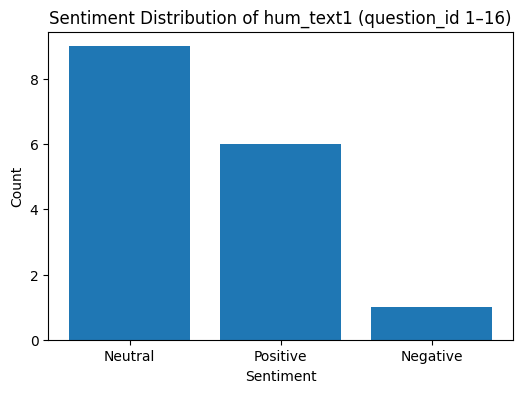

In [3]:
#sentiment analysis
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 16)]

df_filtered = df_filtered.dropna(subset=['hum_text1'])

sia = SentimentIntensityAnalyzer()

df_filtered['sentiment'] = df_filtered['hum_text1'].astype(str).apply(lambda x: sia.polarity_scores(x))

df_filtered['neg'] = df_filtered['sentiment'].apply(lambda x: x['neg'])
df_filtered['neu'] = df_filtered['sentiment'].apply(lambda x: x['neu'])
df_filtered['pos'] = df_filtered['sentiment'].apply(lambda x: x['pos'])
df_filtered['compound'] = df_filtered['sentiment'].apply(lambda x: x['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_filtered['sentiment_label'] = df_filtered['compound'].apply(label_sentiment)

print(df_filtered[['question_id', 'hum_text1', 'compound', 'sentiment_label']])

sentiment_counts = df_filtered['sentiment_label'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title("Sentiment Distribution of hum_text1 (question_id 1–16)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 0: information, chat, provide, credit, general, decision, cards, card
Cluster 1: meeting, need, specialists, needed, book, contact, documents, anything
Cluster 2: credit, card, insurance, travel, offer, automatically, apply, clients
Cluster 3: post, days, case, individual, mailing, fees, euro, income
Cluster 4: yes, client, evaluation, httpswwwseblvenprivatecardsmasstandardcreditcard, opening, first, account, individual


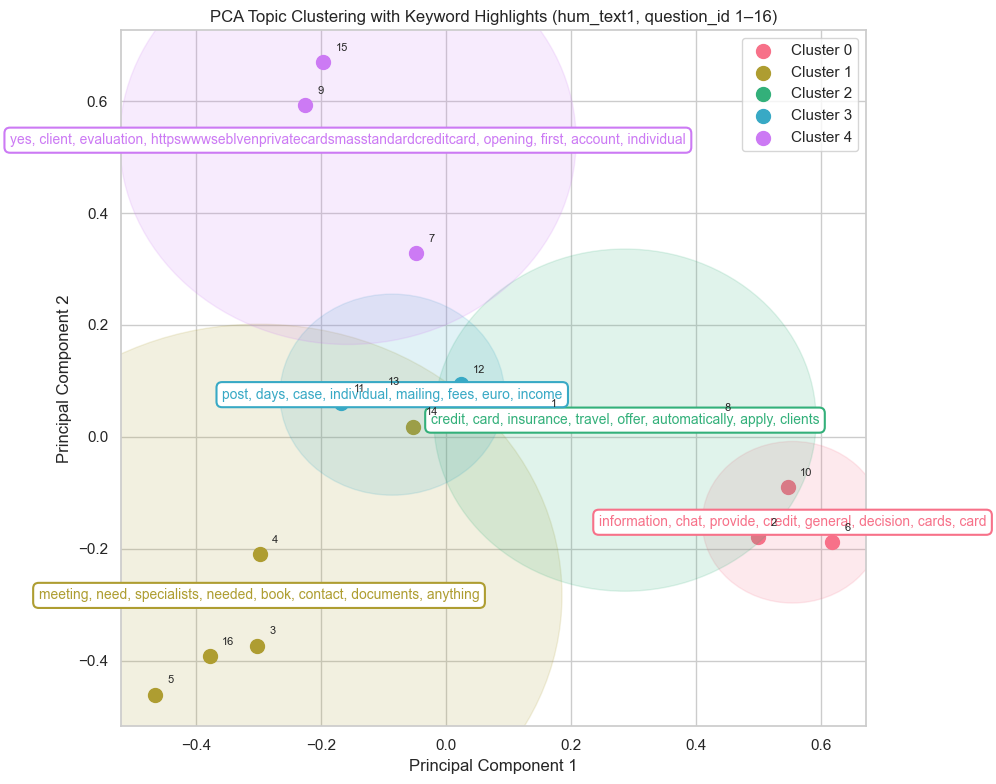

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 16)].dropna(subset=['hum_text1'])

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df_filtered['clean_text'] = df_filtered['hum_text1'].astype(str).apply(clean_text)

# TF-IDF Vectorization 
vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df_filtered['clean_text'])

# PCA Reduction to 2D 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
df_filtered['PCA1'] = pca_result[:, 0]
df_filtered['PCA2'] = pca_result[:, 1]

# KMeans Clustering 
n_clusters = 5 
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(tfidf_matrix)

feature_names = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

cluster_keywords = {}
for i in range(n_clusters):
    top_words = [feature_names[ind] for ind in order_centroids[i, :8]]  # top 8 keywords per cluster
    cluster_keywords[i] = ", ".join(top_words)
    print(f"Cluster {i}: {cluster_keywords[i]}")

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

palette = sns.color_palette("husl", n_clusters)

for i in range(n_clusters):
    cluster_points = df_filtered[df_filtered['Cluster'] == i]
    x_mean, y_mean = cluster_points['PCA1'].mean(), cluster_points['PCA2'].mean()
    radius = np.sqrt(((cluster_points['PCA1'] - x_mean)**2 + (cluster_points['PCA2'] - y_mean)**2).mean()) * 2.2
    
    circle = plt.Circle((x_mean, y_mean), radius, color=palette[i], alpha=0.15)
    plt.gca().add_artist(circle)
    
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], 
                s=100, color=palette[i], label=f"Cluster {i}")
    
    plt.text(x_mean, y_mean, cluster_keywords[i],
             fontsize=10, color=palette[i], ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec=palette[i], lw=1.5))

for i, row in df_filtered.iterrows():
    plt.text(row['PCA1'] + 0.02, row['PCA2'] + 0.02, str(row['question_id']), fontsize=8)

plt.title("PCA Topic Clustering with Keyword Highlights (hum_text1, question_id 1–16)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()

step9: Hum_text2 word frequency, n-gram, sentiment analysis, pca

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 most frequent words in hum_text2:
[('credit', 39), ('card', 25), ('limit', 10), ('bank', 9), ('use', 8), ('application', 7), ('need', 7), ('documents', 7), ('cards', 7), ('able', 6), ('mastercard', 6), ('eur', 6), ('income', 5), ('first', 5), ('apply', 5), ('submit', 5), ('latvia', 5), ('possibility', 5), ('please', 5), ('note', 5)]


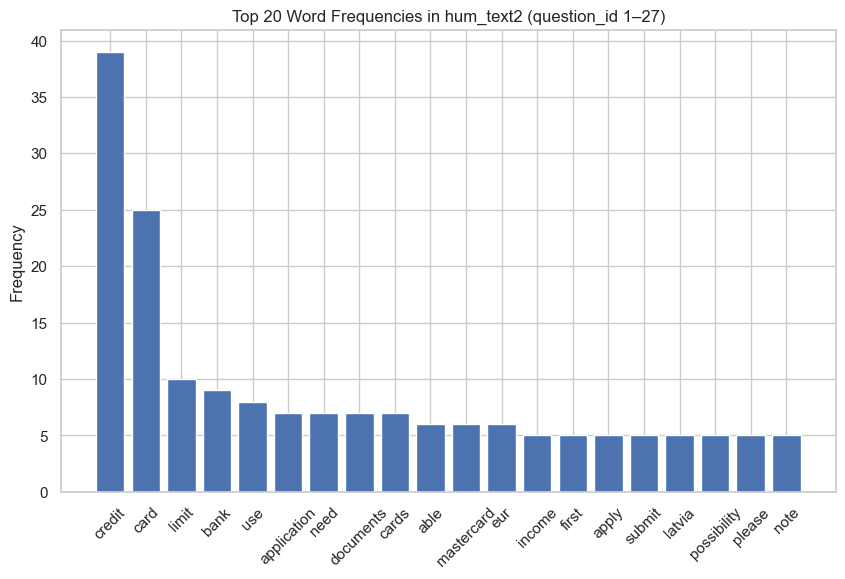

In [ ]:
#Hum_text2  word frequency analysis
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 27)]

texts = df_filtered['hum_text2'].dropna().astype(str)

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  
    text = text.translate(str.maketrans('', '', string.punctuation))  
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words] 
    return tokens

cleaned_texts = [clean_text(t) for t in texts]

all_tokens = [token for sublist in cleaned_texts for token in sublist]

word_freq = Counter(all_tokens)

print("Top 20 most frequent words in hum_text2:")
print(word_freq.most_common(20))

top_words = word_freq.most_common(20)
words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
plt.bar(words, counts)
plt.title("Top 20 Word Frequencies in hum_text2 (question_id 1–27)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()

Top 20 Bigrams in hum_text2:
credit card : 21
credit limit : 8
please note : 5
apply credit : 4
possibility starting : 4
starting cooperation : 4
first need : 3
inperson meeting : 3
necessary submit : 3
submit documents : 3
documents prove : 3
prove connection : 3
connection latvia : 3
credit cards : 3
interest charged : 3
need attend : 2
attend inperson : 2
meeting booked : 2
booked advance : 2
advance website : 2

Top 20 Trigrams in hum_text2:
apply credit card : 4
possibility starting cooperation : 4
necessary submit documents : 3
submit documents prove : 3
documents prove connection : 3
prove connection latvia : 3
first need attend : 2
need attend inperson : 2
attend inperson meeting : 2
inperson meeting booked : 2
meeting booked advance : 2
booked advance website : 2
advance website account : 2
website account open : 2
account open able : 2
open able apply : 2
able apply credit : 2
assessing possibility starting : 2
starting cooperation necessary : 2
cooperation necessary submit :

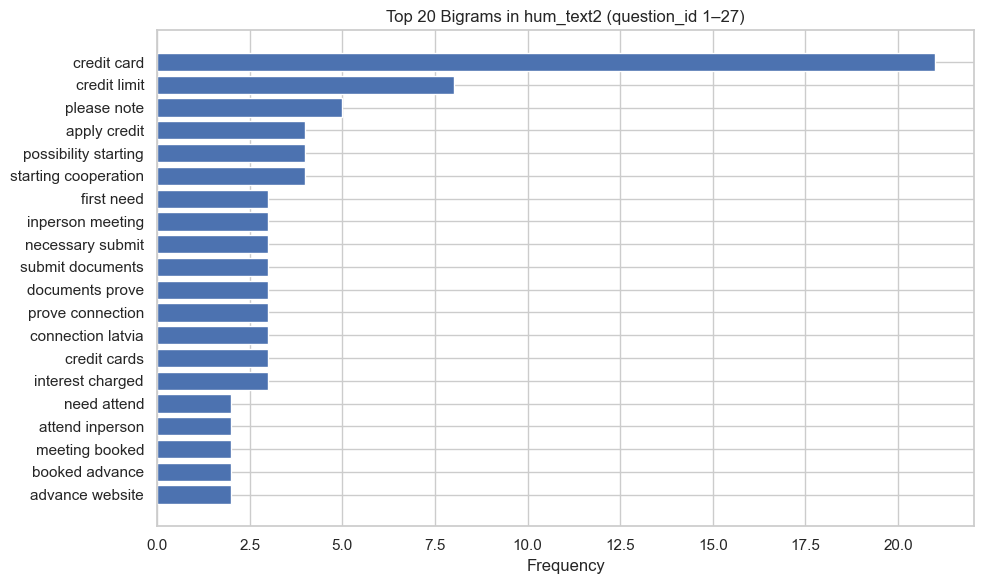

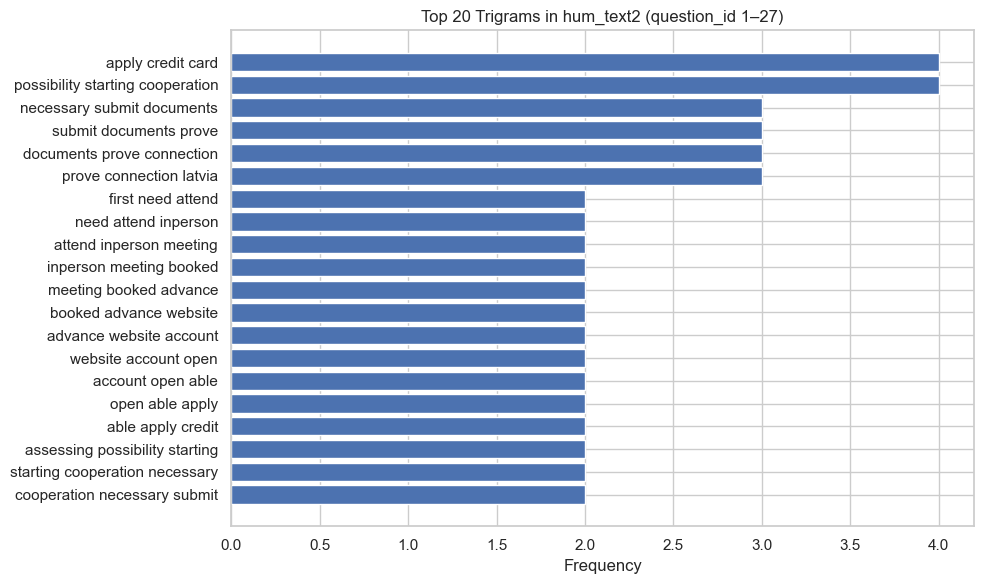

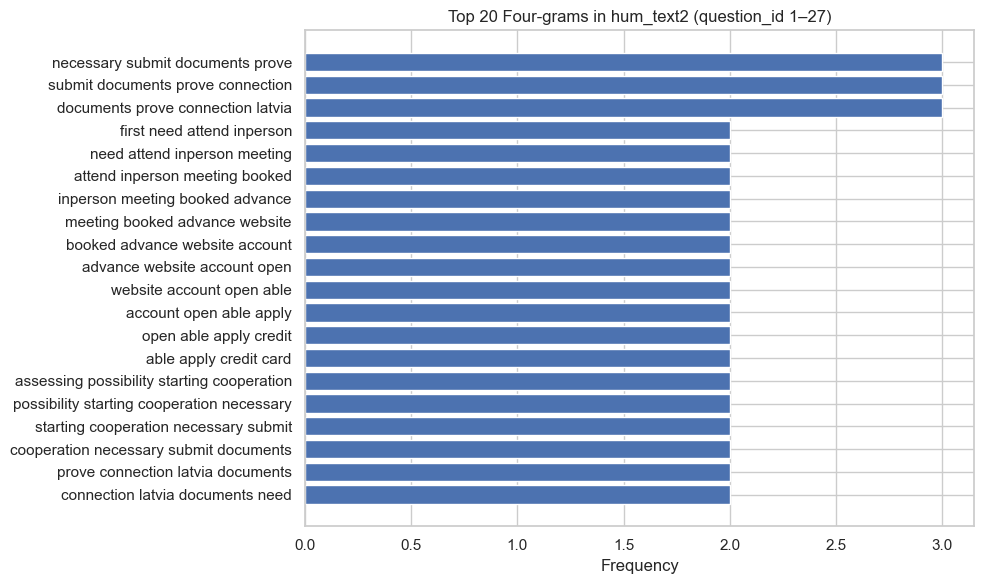

In [11]:
#n-gram analysis for hum_text2
from nltk.util import ngrams

def get_top_ngrams(tokens_list, n=2, top_k=20):
    all_ngrams = []
    for tokens in tokens_list:
        all_ngrams.extend(list(ngrams(tokens, n)))
    freq = Counter(all_ngrams)
    return freq.most_common(top_k)

top_bigrams = get_top_ngrams(cleaned_texts, n=2)
top_trigrams = get_top_ngrams(cleaned_texts, n=3)
top_fourgrams = get_top_ngrams(cleaned_texts, n=4)

print("Top 20 Bigrams in hum_text2:")
for phrase, count in top_bigrams:
    print(' '.join(phrase), ":", count)

print("\nTop 20 Trigrams in hum_text2:")
for phrase, count in top_trigrams:
    print(' '.join(phrase), ":", count)

print("\nTop 20 Four-grams in hum_text2:")
for phrase, count in top_fourgrams:
    print(' '.join(phrase), ":", count)
    
def plot_ngrams(ngram_freq, title):
    phrases = [' '.join(p[0]) for p in ngram_freq]
    counts = [p[1] for p in ngram_freq]
    plt.figure(figsize=(10,6))
    plt.barh(phrases[::-1], counts[::-1])
    plt.title(title)
    plt.xlabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_ngrams(top_bigrams, "Top 20 Bigrams in hum_text2 (question_id 1–27)")
plot_ngrams(top_trigrams, "Top 20 Trigrams in hum_text2 (question_id 1–27)")
plot_ngrams(top_fourgrams, "Top 20 Four-grams in hum_text2 (question_id 1–27)")


    question_id                                          hum_text2  compound  \
0             1  Upon receiving your application, we evaluate t...    0.6705   
1             2  First, you need to attend an in-person meeting...    0.3818   
2             3  It is necessary to submit documents that prove...    0.0000   
3             4  We take into account income from the past 6 mo...    0.0000   
4             5  You understand correctly, but please note that...    0.4497   
5             6  First, you need to attend an in-person meeting...    0.6369   
6             7  The Mastercard Standard card costs EUR 2.50 pe...    0.5390   
7             8  The credit card comes with a credit limit, tra...    0.9022   
8             9  To apply for a credit card, you first need to ...    0.6369   
9            10  Insurance is included only with credit cards. ...    0.7783   
10           11  it will be clearer for the bank where the fund...    0.3612   
11           12  The average processing 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


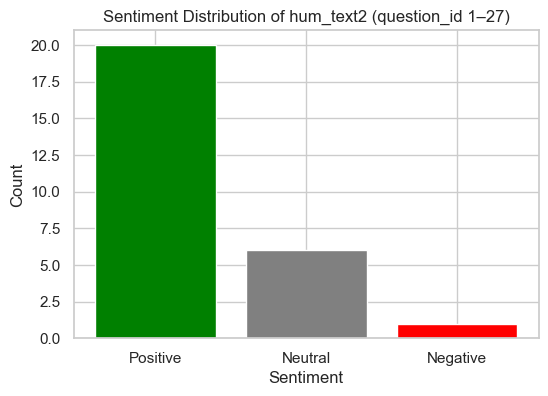

In [12]:
#sentiment analysis for hum_text2
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

df_filtered['sentiment'] = df_filtered['hum_text2'].astype(str).apply(lambda x: sia.polarity_scores(x))

df_filtered['neg'] = df_filtered['sentiment'].apply(lambda x: x['neg'])
df_filtered['neu'] = df_filtered['sentiment'].apply(lambda x: x['neu'])
df_filtered['pos'] = df_filtered['sentiment'].apply(lambda x: x['pos'])
df_filtered['compound'] = df_filtered['sentiment'].apply(lambda x: x['compound'])

def label_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df_filtered['sentiment_label'] = df_filtered['compound'].apply(label_sentiment)

print(df_filtered[['question_id', 'hum_text2', 'compound', 'sentiment_label']])

sentiment_counts = df_filtered['sentiment_label'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green','gray','red'])
plt.title("Sentiment Distribution of hum_text2 (question_id 1–27)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cluster 0: cards, credit, mastercard, insurance, travel, card, available, offer
Cluster 1: adjusted, limits, moment, offers, special, internet, unfortunately, bank
Cluster 2: documents, latvia, prove, necessary, connection, submit, cooperation, starting
Cluster 3: card, able, account, credit, inperson, meeting, submitted, booked
Cluster 4: credit, card, bank, limit, use, funds, salary, valid


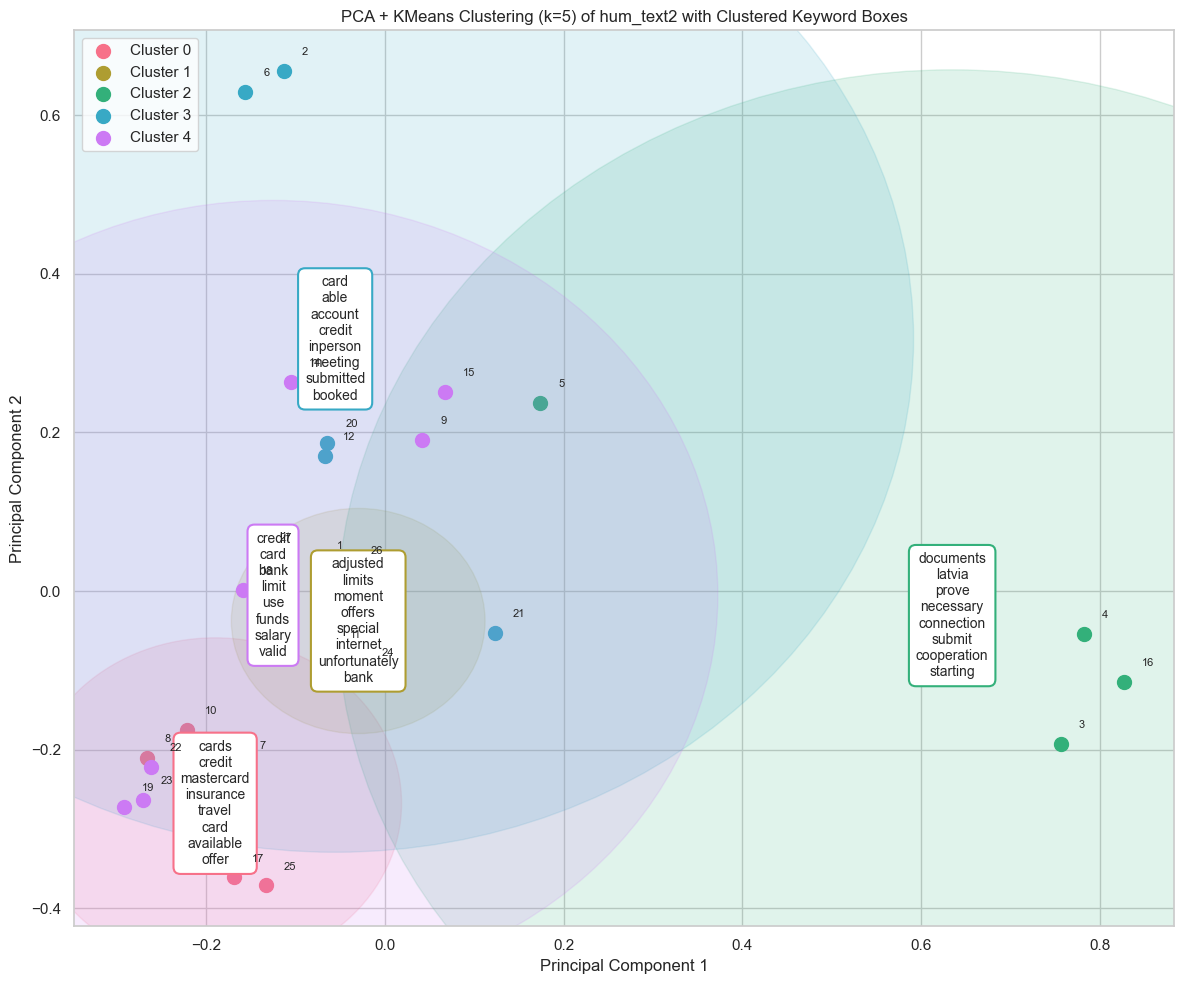

In [24]:
# pca and clustering for hum_text2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['hum_text2'])

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df_filtered['clean_text'] = df_filtered['hum_text2'].astype(str).apply(clean_text)

vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(df_filtered['clean_text']).toarray()
feature_names = vectorizer.get_feature_names_out()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix)
df_filtered['PCA1'] = pca_result[:, 0]
df_filtered['PCA2'] = pca_result[:, 1]

# KMeans clustering k=5 
kmeans = KMeans(n_clusters=5, random_state=42)
df_filtered['Cluster'] = kmeans.fit_predict(tfidf_matrix)

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
cluster_keywords = {}
for i in range(5):
    top_words = [feature_names[ind] for ind in order_centroids[i, :8]]
    cluster_keywords[i] = top_words
    print(f"Cluster {i}: {', '.join(top_words)}")

plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 5)

for i in range(5):
    cluster_points = df_filtered[df_filtered['Cluster'] == i]
    x_mean, y_mean = cluster_points['PCA1'].mean(), cluster_points['PCA2'].mean()
    radius = np.sqrt(((cluster_points['PCA1'] - x_mean)**2 + (cluster_points['PCA2'] - y_mean)**2).mean()) * 2.2

    circle = plt.Circle((x_mean, y_mean), radius, color=palette[i], alpha=0.15)
    plt.gca().add_artist(circle)
    
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], s=100, color=palette[i], label=f"Cluster {i}")
    
    keywords_text = '\n'.join(cluster_keywords[i])
    plt.text(x_mean, y_mean, keywords_text, fontsize=10, ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.5", fc="white", ec=palette[i], lw=1.5))

for i, row in df_filtered.iterrows():
    plt.text(row['PCA1'] + 0.02, row['PCA2'] + 0.02, str(row['question_id']), fontsize=8)

plt.title("PCA + KMeans Clustering (k=5) of hum_text2 with Clustered Keyword Boxes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.tight_layout()
plt.show()

step9: word frequency, n-gram, sentiment analysis, pca for deepseek_text0 and deepseek_text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


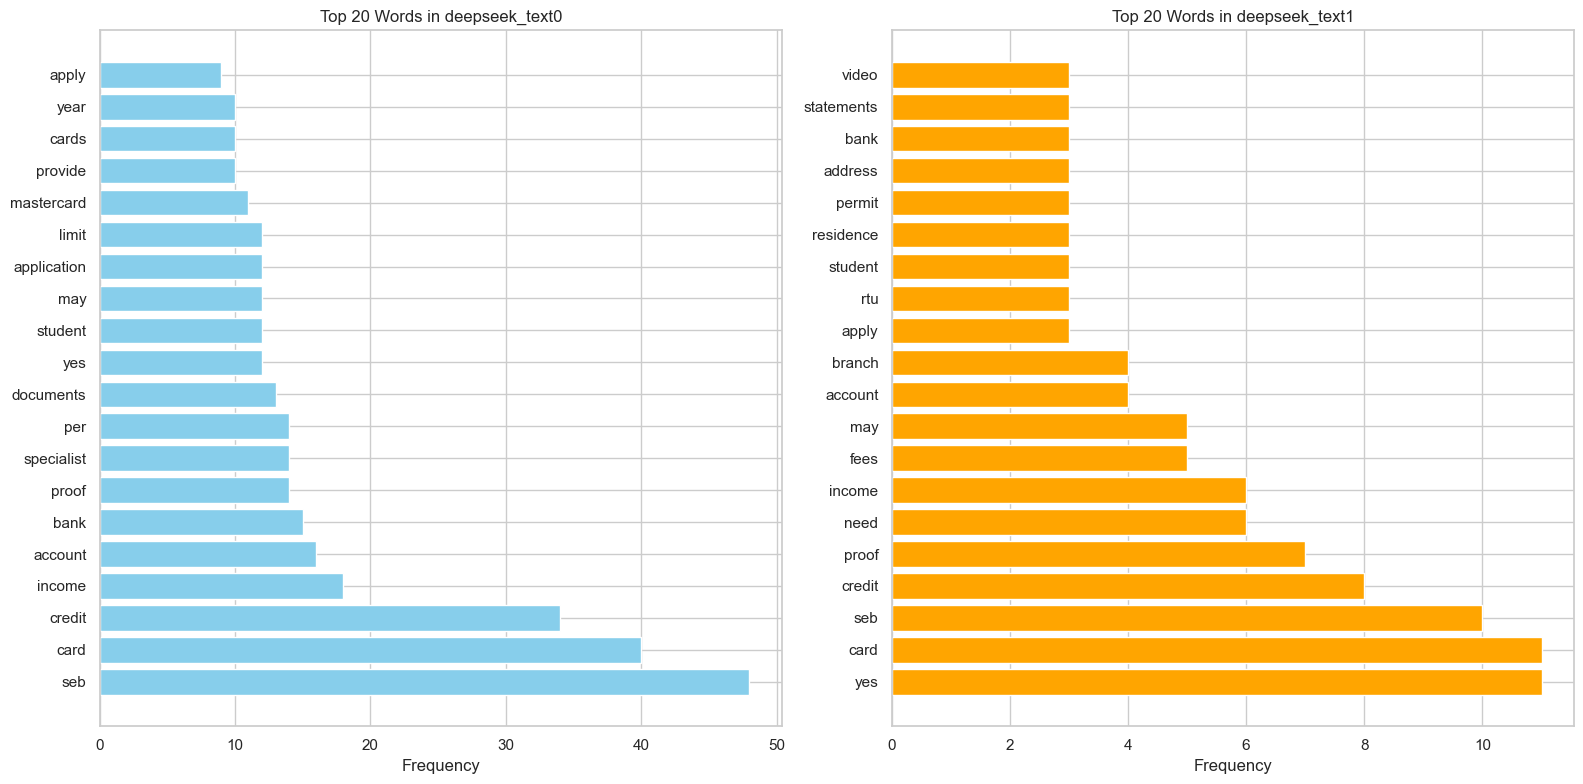

In [ ]:
#word frequency analysis for deepseek_text0 and deepseek_text1
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 27)]

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df_filtered['text0_tokens'] = df_filtered['deepseek_text0'].astype(str).apply(clean_text)
df_filtered['text1_tokens'] = df_filtered['deepseek_text1'].astype(str).apply(clean_text)

all_tokens0 = [token for sublist in df_filtered['text0_tokens'] for token in sublist]
all_tokens1 = [token for sublist in df_filtered['text1_tokens'] for token in sublist]

freq0 = Counter(all_tokens0)
freq1 = Counter(all_tokens1)

top20_words0 = freq0.most_common(20)
top20_words1 = freq1.most_common(20)

words0, counts0 = zip(*top20_words0)
words1, counts1 = zip(*top20_words1)

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.barh(range(len(words0)), counts0, color='skyblue')
plt.yticks(range(len(words0)), words0)
plt.xlabel('Frequency')
plt.title('Top 20 Words in deepseek_text0')

plt.subplot(1,2,2)
plt.barh(range(len(words1)), counts1, color='orange')
plt.yticks(range(len(words1)), words1)
plt.xlabel('Frequency')
plt.title('Top 20 Words in deepseek_text1')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


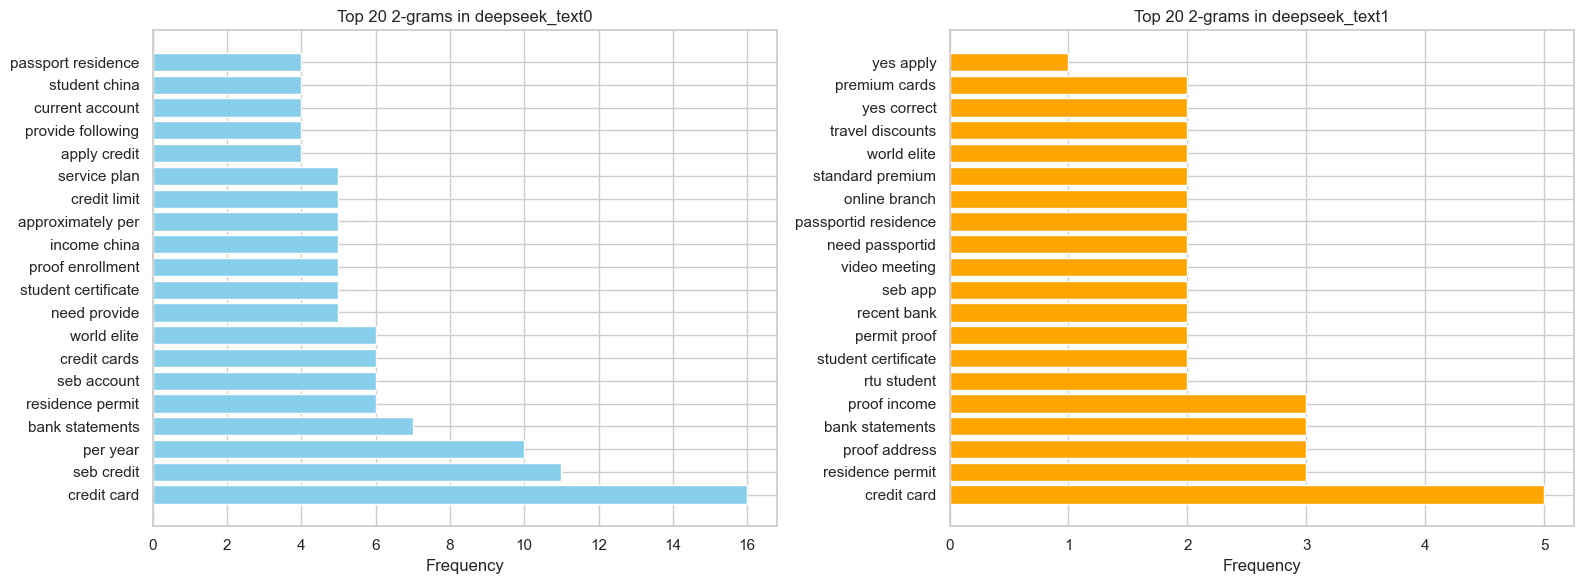

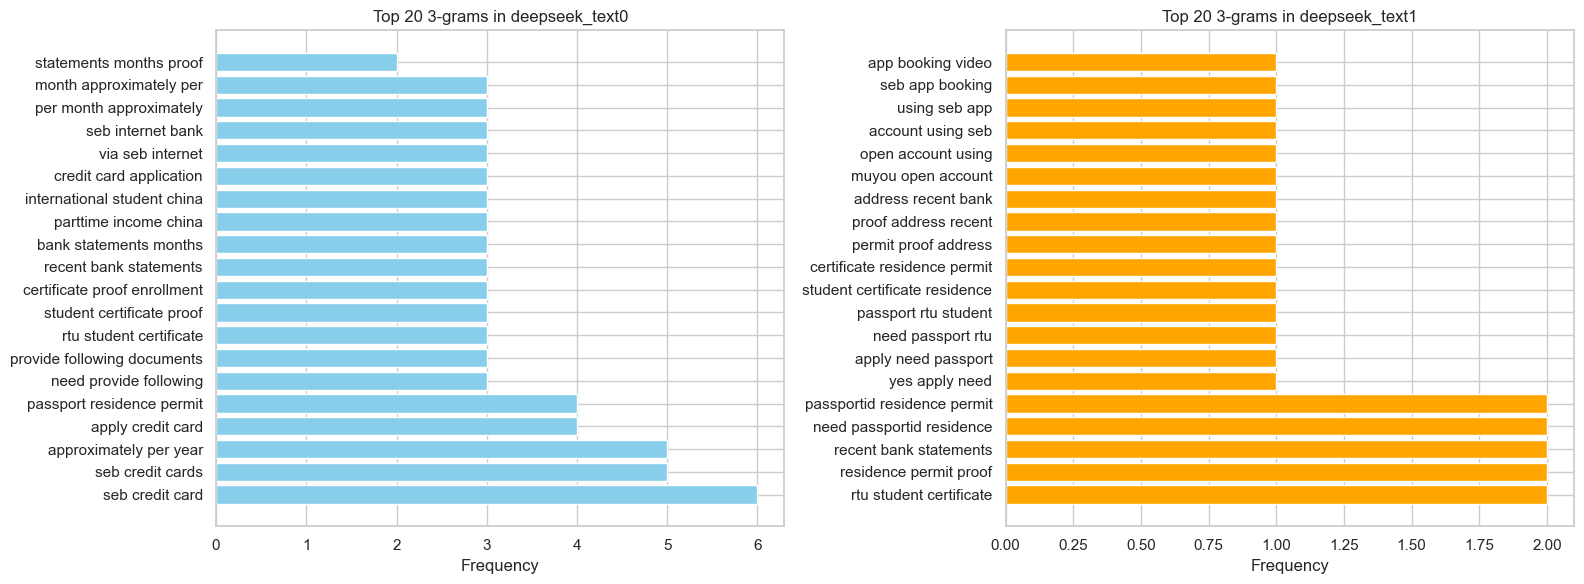

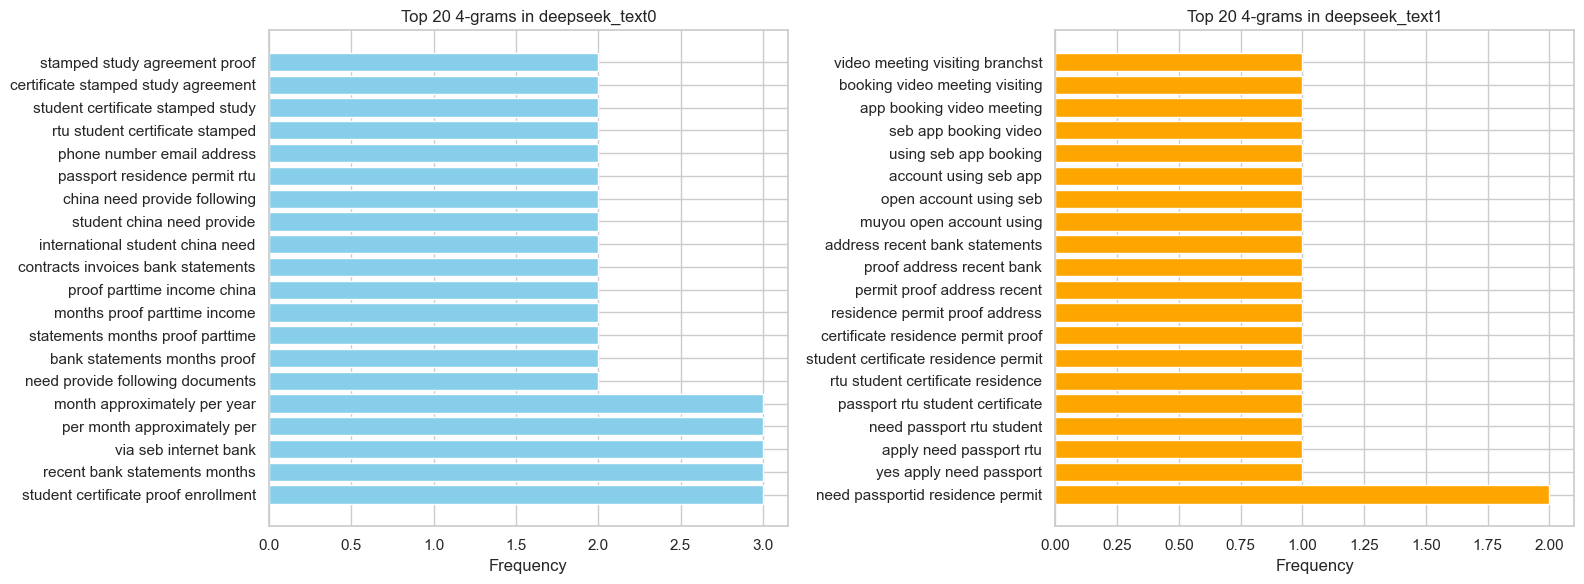

In [ ]:
#n-gram analysis for deepseek_text0 and deepseek_text1
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 27)]

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df_filtered['text0_tokens'] = df_filtered['deepseek_text0'].astype(str).apply(clean_text)
df_filtered['text1_tokens'] = df_filtered['deepseek_text1'].astype(str).apply(clean_text)

def get_ngrams(tokens_list, n=2):
    all_ngrams = []
    for tokens in tokens_list:
        all_ngrams.extend([' '.join(gram) for gram in ngrams(tokens, n)])
    return all_ngrams

ngram_levels = [2, 3, 4]

for n in ngram_levels:
    ngrams0 = get_ngrams(df_filtered['text0_tokens'], n=n)
    ngrams1 = get_ngrams(df_filtered['text1_tokens'], n=n)
    
    freq0 = Counter(ngrams0)
    freq1 = Counter(ngrams1)
    
    top20_ngrams0 = freq0.most_common(20)
    top20_ngrams1 = freq1.most_common(20)
    
    ngrams_words0, counts0 = zip(*top20_ngrams0)
    ngrams_words1, counts1 = zip(*top20_ngrams1)
    
    plt.figure(figsize=(16,6))
    
    plt.subplot(1,2,1)
    plt.barh(range(len(ngrams_words0)), counts0, color='skyblue')
    plt.yticks(range(len(ngrams_words0)), ngrams_words0)
    plt.xlabel('Frequency')
    plt.title(f'Top 20 {n}-grams in deepseek_text0')
    
    plt.subplot(1,2,2)
    plt.barh(range(len(ngrams_words1)), counts1, color='orange')
    plt.yticks(range(len(ngrams_words1)), ngrams_words1)
    plt.xlabel('Frequency')
    plt.title(f'Top 20 {n}-grams in deepseek_text1')
    
    plt.tight_layout()
    plt.show()

    question_id                                     deepseek_text0  \
0             1  Yes, you can apply for a credit card as a mast...   
1             2  You can open an SEB account in one of three wa...   
2             3  As an international student from China, you wi...   
3             4  Yes, based on your situation as a student from...   
4             5  Yes, that is correct.\n\nYou should first sche...   
5             6  Of course. The normal procedure for getting an...   
6             7  Certainly. Here are the normal monthly and ann...   
7             8  Yes, SEB has promotional offers that vary by c...   
8             9  Your part-time income from China can be accept...   
9            10  Yes, the purchase insurance on SEB credit card...   
10           11  Yes, that is absolutely correct.\n\nHaving a s...   
11           12  After your application is approved, the physic...   
12           13  Yes, there is a mailing fee for sending the ca...   
13           14  Yes

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


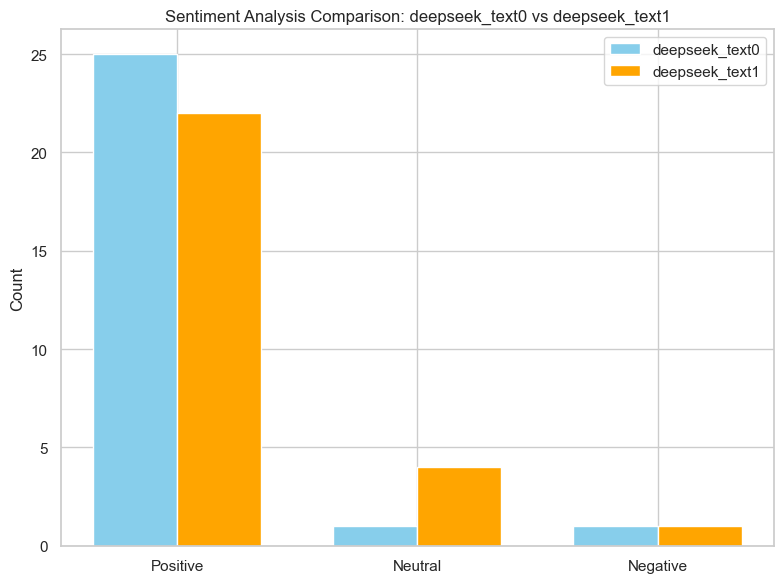

In [ ]:
#sentiment analysis for deepseek_text0 and deepseek_text1
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")

df_filtered = df[df['question_id'].between(1, 27)].copy()

def get_sentiment(text):
    if pd.isna(text):
        compound = 0.0
        label = 'Neutral'
    else:
        compound = sia.polarity_scores(str(text))['compound']
        if compound >= 0.05:
            label = 'Positive'
        elif compound <= -0.05:
            label = 'Negative'
        else:
            label = 'Neutral'
    return pd.Series([compound, label])

df_filtered[['text0_compound', 'text0_sentiment']] = df_filtered['deepseek_text0'].apply(get_sentiment)
df_filtered[['text1_compound', 'text1_sentiment']] = df_filtered['deepseek_text1'].apply(get_sentiment)

output_columns = ['question_id', 'deepseek_text0', 'text0_compound', 'text0_sentiment',
                  'deepseek_text1', 'text1_compound', 'text1_sentiment']
print(df_filtered[output_columns])

sentiments = ['Positive', 'Neutral', 'Negative']
counts_text0 = [df_filtered['text0_sentiment'].value_counts().get(s, 0) for s in sentiments]
counts_text1 = [df_filtered['text1_sentiment'].value_counts().get(s, 0) for s in sentiments]

# Plot grouped bar chart 
x = np.arange(len(sentiments))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, counts_text0, width, label='deepseek_text0', color='skyblue')
plt.bar(x + width/2, counts_text1, width, label='deepseek_text1', color='orange')

plt.xticks(x, sentiments)
plt.ylabel('Count')
plt.title('Sentiment Analysis Comparison: deepseek_text0 vs deepseek_text1')
plt.legend()
plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


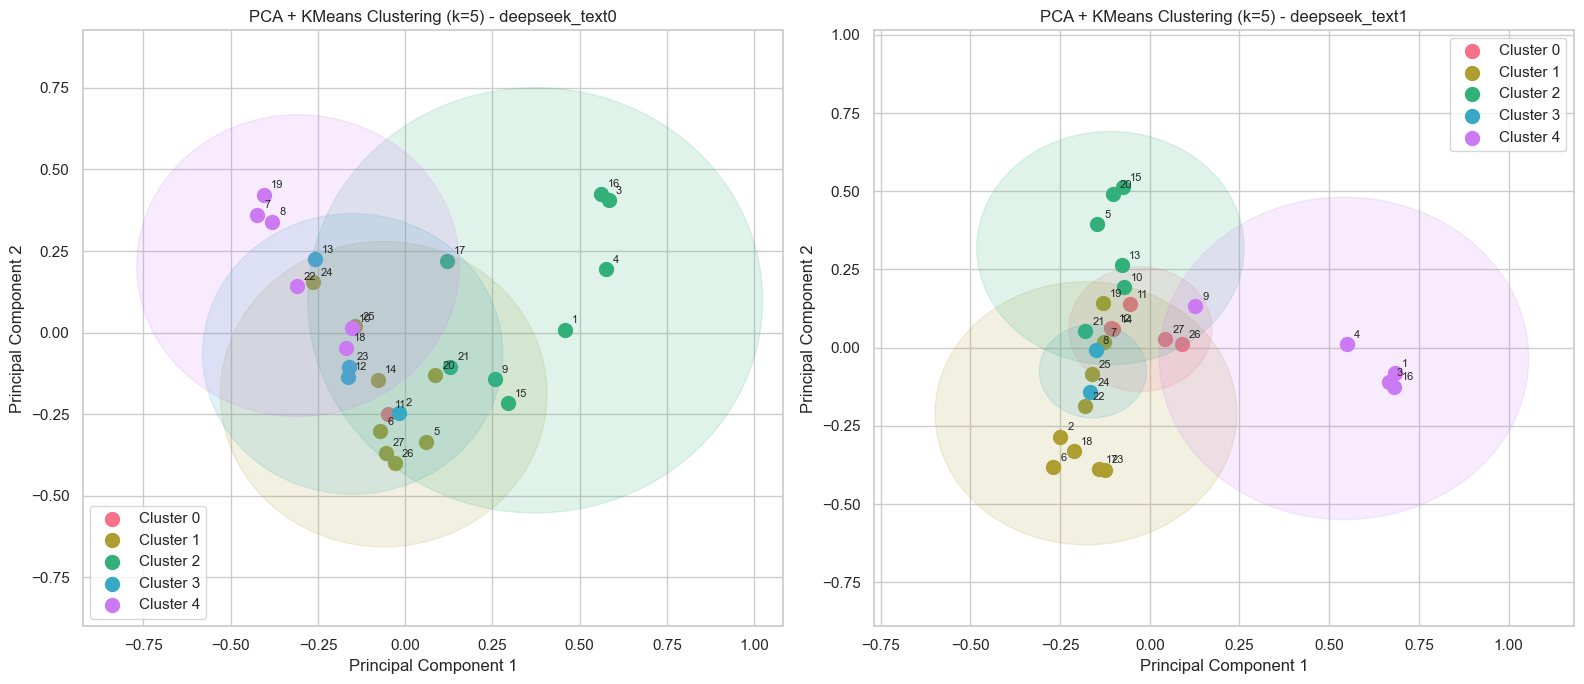

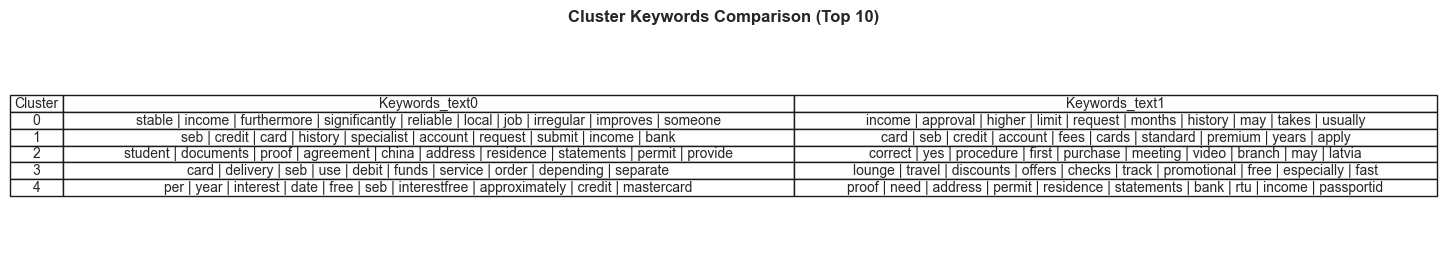

In [ ]:
#pca and clustering for deepseek_text0 and deepseek_text1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['deepseek_text0', 'deepseek_text1'])

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df_filtered['text0_clean'] = df_filtered['deepseek_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['deepseek_text1'].apply(clean_text)

def pca_kmeans(text_series, n_clusters=5, top_n_keywords=10):
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(text_series).toarray()
    feature_names = vectorizer.get_feature_names_out()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_matrix)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    cluster_keywords = {}
    for i in range(n_clusters):
        cluster_keywords[i] = [feature_names[ind] for ind in order_centroids[i, :top_n_keywords]]
    
    return pca_result, clusters, cluster_keywords

pca_result0, clusters0, keywords0 = pca_kmeans(df_filtered['text0_clean'])
pca_result1, clusters1, keywords1 = pca_kmeans(df_filtered['text1_clean'])

df_filtered['PCA0_1'] = pca_result0[:,0]
df_filtered['PCA0_2'] = pca_result0[:,1]
df_filtered['Cluster0'] = clusters0

df_filtered['PCA1_1'] = pca_result1[:,0]
df_filtered['PCA1_2'] = pca_result1[:,1]
df_filtered['Cluster1'] = clusters1

# Plot PCA + KMeans points and cluster circles (no keywords) 
plt.figure(figsize=(16,7))
palette = sns.color_palette("husl", 5)

for idx, (pca_x, pca_y, cluster_labels, title) in enumerate([
    ('PCA0_1','PCA0_2','Cluster0', 'deepseek_text0'),
    ('PCA1_1','PCA1_2','Cluster1', 'deepseek_text1')
]):
    plt.subplot(1,2,idx+1)
    
    x_min, x_max = df_filtered[pca_x].min()-0.5, df_filtered[pca_x].max()+0.5
    y_min, y_max = df_filtered[pca_y].min()-0.5, df_filtered[pca_y].max()+0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    for i in range(5):
        cluster_points = df_filtered[df_filtered[cluster_labels]==i]
        x_mean, y_mean = cluster_points[pca_x].mean(), cluster_points[pca_y].mean()
        radius = np.sqrt(((cluster_points[pca_x]-x_mean)**2 + (cluster_points[pca_y]-y_mean)**2).mean())*2.2
        
        circle = plt.Circle((x_mean, y_mean), radius, color=palette[i], alpha=0.15)
        plt.gca().add_artist(circle)
        
        plt.scatter(cluster_points[pca_x], cluster_points[pca_y], s=100, color=palette[i], label=f'Cluster {i}')
    
    for j, row in df_filtered.iterrows():
        plt.text(row[pca_x]+0.02, row[pca_y]+0.02, str(row['question_id']), fontsize=8)
    
    plt.title(f'PCA + KMeans Clustering (k=5) - {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()

cluster_comparison = pd.DataFrame({
    'Cluster': list(range(5)),
    'Keywords_text0': [' | '.join(keywords0[i]) for i in range(5)],
    'Keywords_text1': [' | '.join(keywords1[i]) for i in range(5)]
})

fig, ax = plt.subplots(figsize=(12,3))
ax.axis('off') 

# Create table
table = ax.table(
    cellText=cluster_comparison.values,
    colLabels=cluster_comparison.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cluster_comparison.columns))))

plt.title('Cluster Keywords Comparison (Top 10)', fontsize=12, fontweight='bold')
plt.show()


step10: word frequency, n-gram, sentiment analysis, pca for gpt120p_text0 and gpt120p_text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


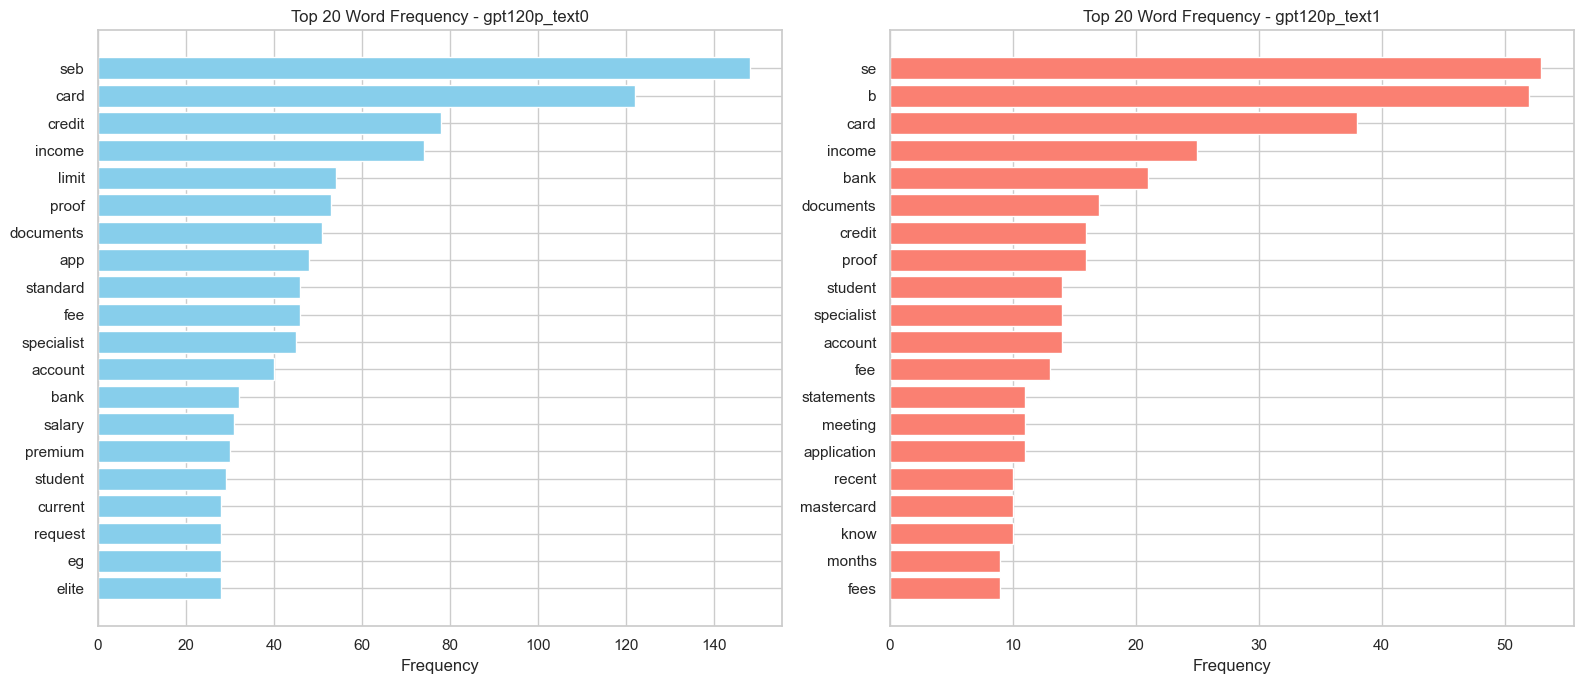

In [ ]:
# word frequency analysis for gpt_text0 and gpt_text1
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1,27)].dropna(subset=['gpt120p_text0','gpt120p_text1'])

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df_filtered['text0_clean'] = df_filtered['gpt120p_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['gpt120p_text1'].apply(clean_text)

counter0 = Counter([word for tokens in df_filtered['text0_clean'] for word in tokens])
counter1 = Counter([word for tokens in df_filtered['text1_clean'] for word in tokens])

top20_0 = counter0.most_common(20)
top20_1 = counter1.most_common(20)

words0, freq0 = zip(*top20_0)
words1, freq1 = zip(*top20_1)

fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].barh(words0[::-1], freq0[::-1], color='skyblue')
axes[0].set_title('Top 20 Word Frequency - gpt120p_text0')
axes[0].set_xlabel('Frequency')

axes[1].barh(words1[::-1], freq1[::-1], color='salmon')
axes[1].set_title('Top 20 Word Frequency - gpt120p_text1')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


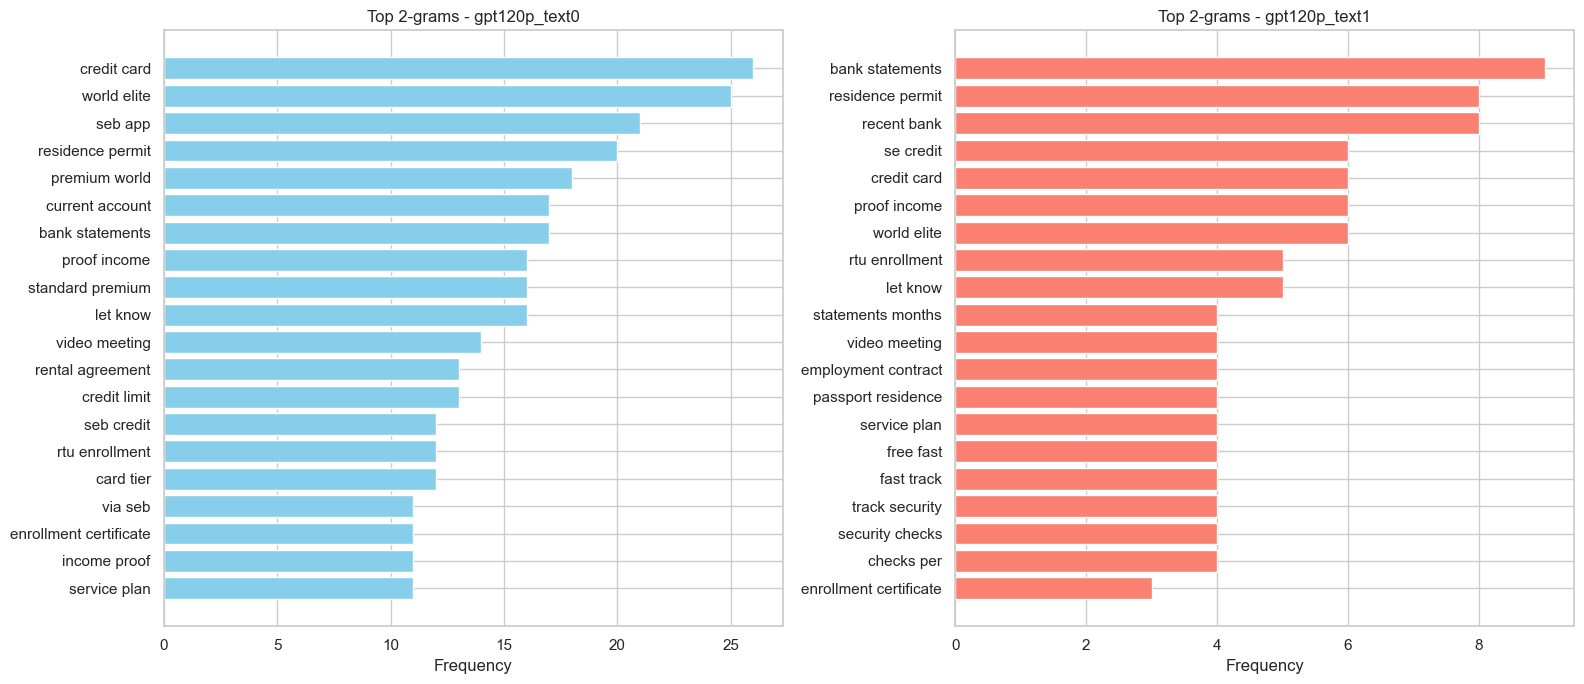

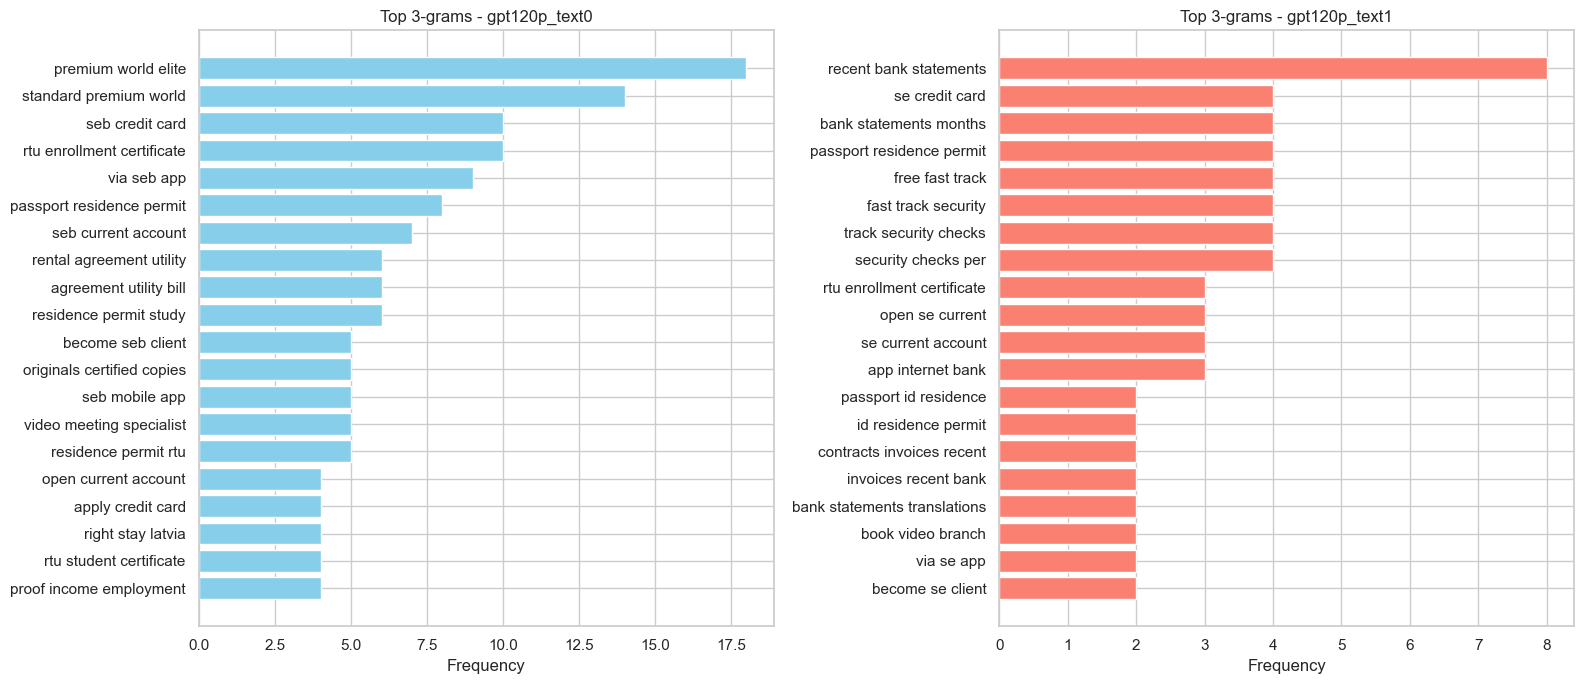

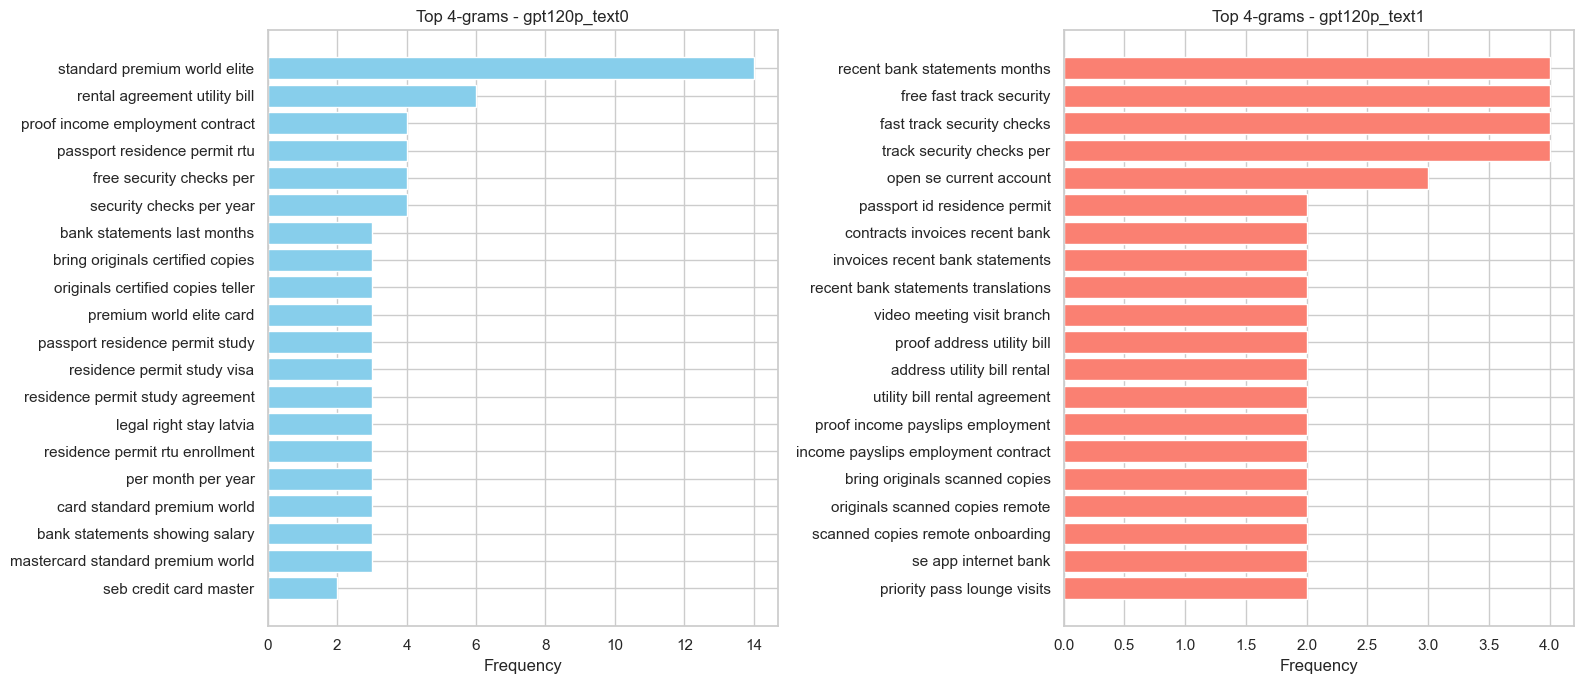

In [ ]:
#n-gram analysis for gpt120p_text0 and gpt120p_text1
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1,27)].dropna(subset=['gpt120p_text0','gpt120p_text1'])

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    return " ".join(tokens)

df_filtered['text0_clean'] = df_filtered['gpt120p_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['gpt120p_text1'].apply(clean_text)

def get_top_ngrams(corpus, ngram_range=(2,2), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(corpus)
    sums = X.sum(axis=0)
    words_freq = [(word, sums[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:top_n]

ngram_sizes = [2,3,4]

for n in ngram_sizes:
    top_ngrams0 = get_top_ngrams(df_filtered['text0_clean'], ngram_range=(n,n))
    top_ngrams1 = get_top_ngrams(df_filtered['text1_clean'], ngram_range=(n,n))
    
    words0, freq0 = zip(*top_ngrams0) if top_ngrams0 else ([],[])
    words1, freq1 = zip(*top_ngrams1) if top_ngrams1 else ([],[])
    
    fig, axes = plt.subplots(1,2, figsize=(16,7))
    
    axes[0].barh(words0[::-1], freq0[::-1], color='skyblue')
    axes[0].set_title(f'Top {n}-grams - gpt120p_text0')
    axes[0].set_xlabel('Frequency')
    
    axes[1].barh(words1[::-1], freq1[::-1], color='salmon')
    axes[1].set_title(f'Top {n}-grams - gpt120p_text1')
    axes[1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


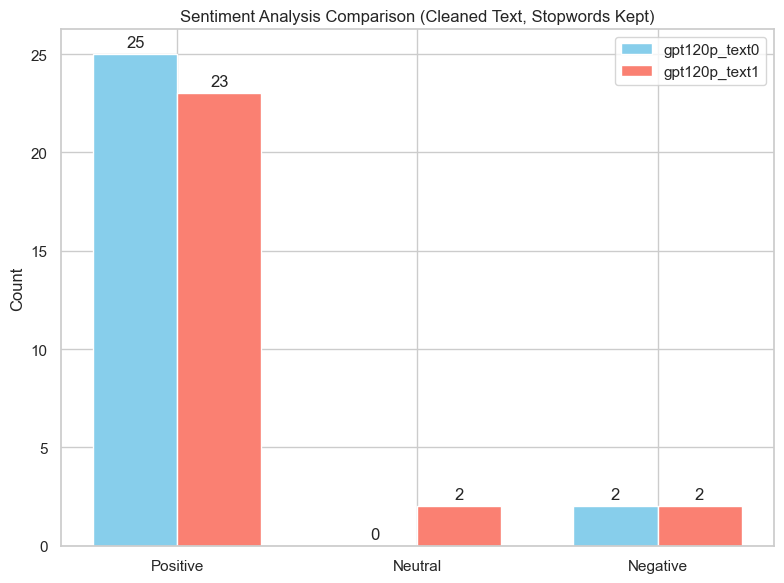

    Question_ID                                                             Text0 (context)  Text0_sentiment_score Text0_sentiment  \
0             1                               yes you can apply for a seb credit card while                  0.981        Positive   
1             2                          how to become an seb client open a current account                  0.980        Positive   
2             3                 documents required to become an seb client document why seb                  0.984        Positive   
3             4       your list residence permit rental agreement passport covers the basic                  0.985        Positive   
4             5              yes the recommended sequence is contact a seb specialist first                  0.796        Positive   
5             6        typical seb creditcard process stepbystep step what happens what you                  0.986        Positive   
6             7             seb creditcard fees monthly annual

In [ ]:
#sentiment analysis for gpt120p_text0 and gpt120p_text1
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import numpy as np


nltk.download('vader_lexicon')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1,27)].dropna(subset=['gpt120p_text0','gpt120p_text1'])

def clean_text_full(text):
    text = str(text).lower()
    text = re.sub(r'[\n\r\t\u202f\u00a0]', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df_filtered['text0_clean'] = df_filtered['gpt120p_text0'].apply(clean_text_full)
df_filtered['text1_clean'] = df_filtered['gpt120p_text1'].apply(clean_text_full)

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        label = 'Positive'
    elif score <= -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'
    return pd.Series([score, label])

df_filtered[['text0_compound','text0_sentiment']] = df_filtered['text0_clean'].apply(get_sentiment)
df_filtered[['text1_compound','text1_sentiment']] = df_filtered['text1_clean'].apply(get_sentiment)

# Side-by-side bar plot for sentiment counts 
sentiment_order = ['Positive','Neutral','Negative']
counts0 = df_filtered['text0_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)
counts1 = df_filtered['text1_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)

x = np.arange(len(sentiment_order))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars0 = ax.bar(x - width/2, counts0, width, label='gpt120p_text0', color='skyblue')
bars1 = ax.bar(x + width/2, counts1, width, label='gpt120p_text1', color='salmon')

ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison (Cleaned Text, Stopwords Kept)')
ax.set_xticks(x)
ax.set_xticklabels(sentiment_order)
ax.legend()

for bars in [bars0, bars1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

import pandas as pd
import re

# Function to clean text (remove special characters, lowercase, keep stopwords) 
def clean_text_full(text):
    text = str(text).lower()
    text = re.sub(r'[\n\r\t\u202f\u00a0]', ' ', text)  # replace newline/tab/special spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # remove non-letters
    text = re.sub(r'\s+', ' ', text)                  # merge multiple spaces
    return text.strip()

def first_n_words(text, n=10):
    words = text.split()
    return ' '.join(words[:n])

report_table = pd.DataFrame({
    'Question_ID': df_filtered['question_id'],
    'Text0 (context)': df_filtered['text0_clean'].apply(lambda x: first_n_words(x, 10)),
    'Text0_sentiment_score': df_filtered['text0_compound'].round(3),
    'Text0_sentiment': df_filtered['text0_sentiment'],
    'Text1 (context)': df_filtered['text1_clean'].apply(lambda x: first_n_words(x, 10)),
    'Text1_sentiment_score': df_filtered['text1_compound'].round(3),
    'Text1_sentiment': df_filtered['text1_sentiment']
})

report_table = report_table[['Question_ID',
                             'Text0 (context)', 'Text0_sentiment_score', 'Text0_sentiment',
                             'Text1 (context)', 'Text1_sentiment_score', 'Text1_sentiment']]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)

print(report_table)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


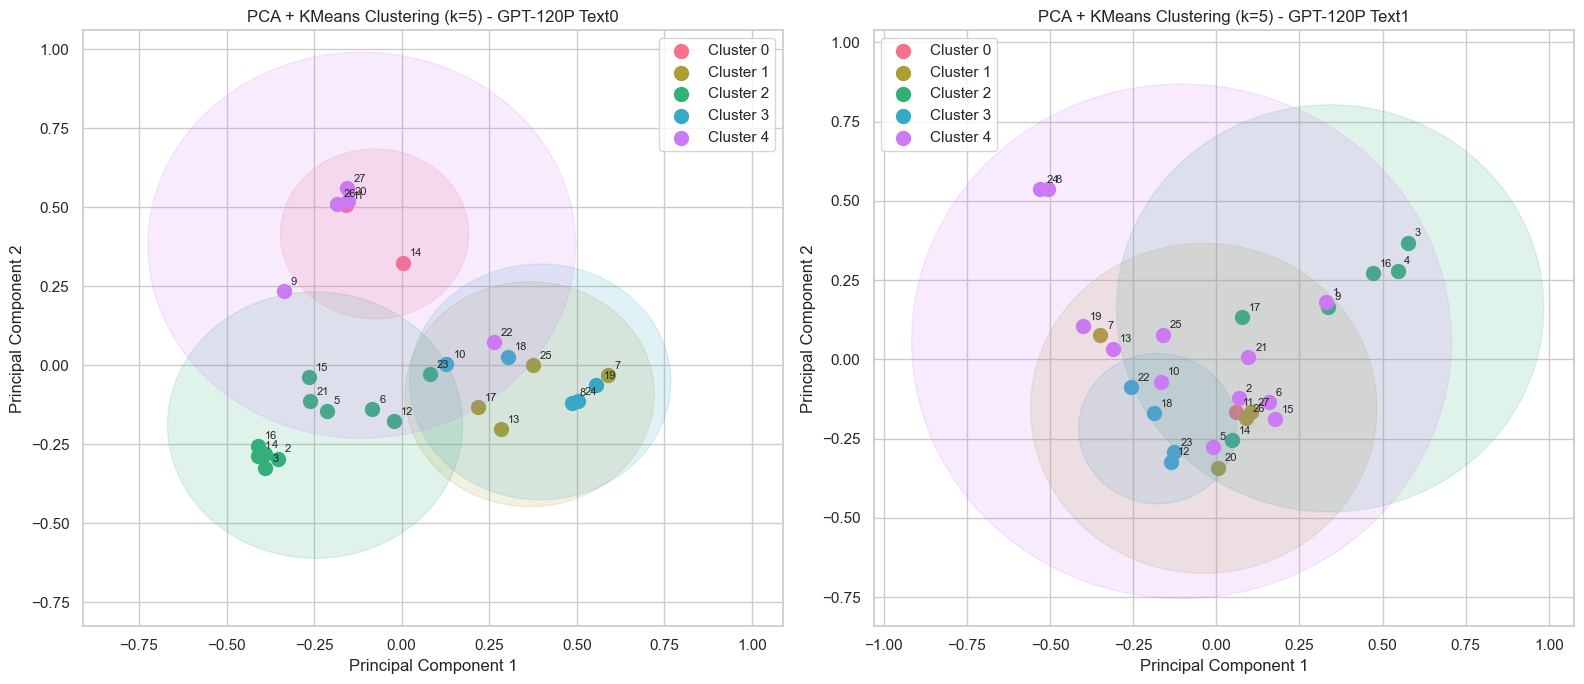

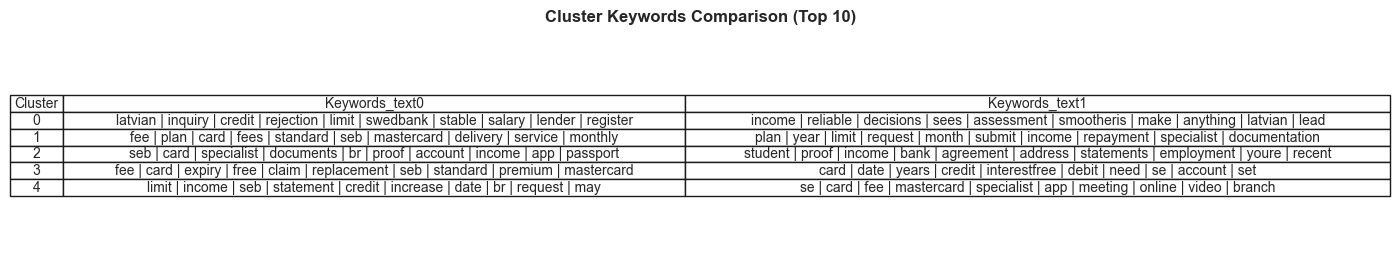

In [64]:
#pca and clustering for gpt120p_text0 and gpt120p_text1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['gpt120p_text0', 'gpt120p_text1'])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[\n\r\t\u202f\u00a0]', ' ', text)  # replace newlines, tabs, special spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # keep only letters
    text = re.sub(r'\s+', ' ', text)                  # remove multiple spaces
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df_filtered['text0_clean'] = df_filtered['gpt120p_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['gpt120p_text1'].apply(clean_text)

def pca_kmeans(text_series, n_clusters=5, top_n_keywords=10):
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(text_series).toarray()
    feature_names = vectorizer.get_feature_names_out()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_matrix)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    cluster_keywords = {}
    for i in range(n_clusters):
        cluster_keywords[i] = [feature_names[ind] for ind in order_centroids[i, :top_n_keywords]]
    
    return pca_result, clusters, cluster_keywords

pca_result0, clusters0, keywords0 = pca_kmeans(df_filtered['text0_clean'])
pca_result1, clusters1, keywords1 = pca_kmeans(df_filtered['text1_clean'])

df_filtered['PCA0_1'] = pca_result0[:,0]
df_filtered['PCA0_2'] = pca_result0[:,1]
df_filtered['Cluster0'] = clusters0

df_filtered['PCA1_1'] = pca_result1[:,0]
df_filtered['PCA1_2'] = pca_result1[:,1]
df_filtered['Cluster1'] = clusters1

plt.figure(figsize=(16,7))
palette = sns.color_palette("husl", 5)

for idx, (pca_x, pca_y, cluster_labels, title) in enumerate([
    ('PCA0_1','PCA0_2','Cluster0', 'GPT-120P Text0'),
    ('PCA1_1','PCA1_2','Cluster1', 'GPT-120P Text1')
]):
    plt.subplot(1,2,idx+1)
    
    x_min, x_max = df_filtered[pca_x].min()-0.5, df_filtered[pca_x].max()+0.5
    y_min, y_max = df_filtered[pca_y].min()-0.5, df_filtered[pca_y].max()+0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    for i in range(5):
        cluster_points = df_filtered[df_filtered[cluster_labels]==i]
        x_mean, y_mean = cluster_points[pca_x].mean(), cluster_points[pca_y].mean()
        radius = np.sqrt(((cluster_points[pca_x]-x_mean)**2 + (cluster_points[pca_y]-y_mean)**2).mean())*2.2
        
        circle = plt.Circle((x_mean, y_mean), radius, color=palette[i], alpha=0.15)
        plt.gca().add_artist(circle)
        
        plt.scatter(cluster_points[pca_x], cluster_points[pca_y], s=100, color=palette[i], label=f'Cluster {i}')
    
    for j, row in df_filtered.iterrows():
        plt.text(row[pca_x]+0.02, row[pca_y]+0.02, str(row['question_id']), fontsize=8)
    
    plt.title(f'PCA + KMeans Clustering (k=5) - {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()

cluster_comparison = pd.DataFrame({
    'Cluster': list(range(5)),
    'Keywords_text0': [' | '.join(keywords0[i]) for i in range(5)],
    'Keywords_text1': [' | '.join(keywords1[i]) for i in range(5)]
})

fig, ax = plt.subplots(figsize=(12,3))
ax.axis('off') 

table = ax.table(
    cellText=cluster_comparison.values,
    colLabels=cluster_comparison.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cluster_comparison.columns))))

plt.title('Cluster Keywords Comparison (Top 10)', fontsize=12, fontweight='bold')
plt.show()


step11: word frequency, n-gram, sentiment analysis, pca for llama_text0 and llama_text1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


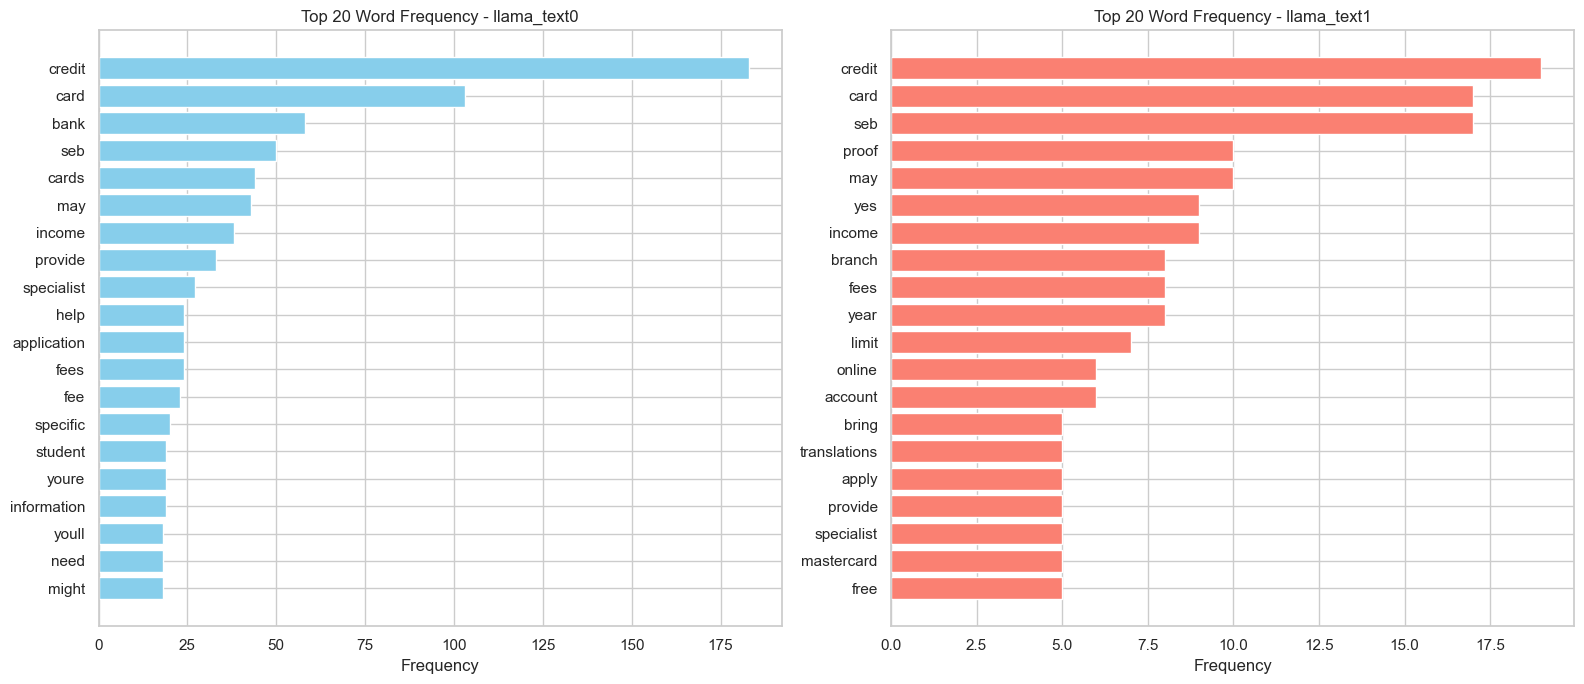

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['llama_text0', 'llama_text1'])

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'\s+', ' ', text)  # remove multiple spaces, tabs, newlines
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-letters
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]  # remove stopwords and single letters
    return tokens

df_filtered['text0_clean'] = df_filtered['llama_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['llama_text1'].apply(clean_text)

counter0 = Counter([word for tokens in df_filtered['text0_clean'] for word in tokens])
counter1 = Counter([word for tokens in df_filtered['text1_clean'] for word in tokens])

top20_0 = counter0.most_common(20)
top20_1 = counter1.most_common(20)

words0, freq0 = zip(*top20_0)
words1, freq1 = zip(*top20_1)

fig, axes = plt.subplots(1, 2, figsize=(16,7))

axes[0].barh(words0[::-1], freq0[::-1], color='skyblue')
axes[0].set_title('Top 20 Word Frequency - llama_text0')
axes[0].set_xlabel('Frequency')

axes[1].barh(words1[::-1], freq1[::-1], color='salmon')
axes[1].set_title('Top 20 Word Frequency - llama_text1')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


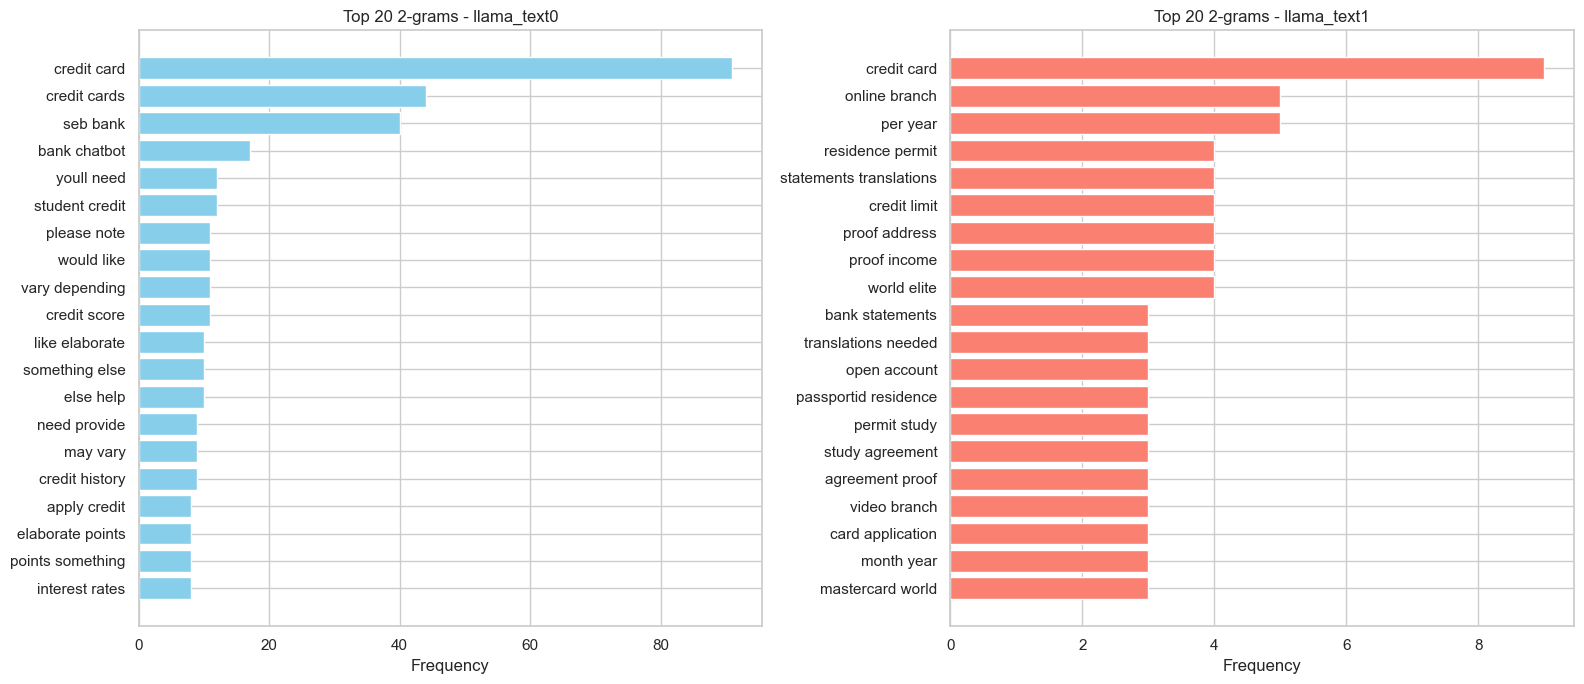

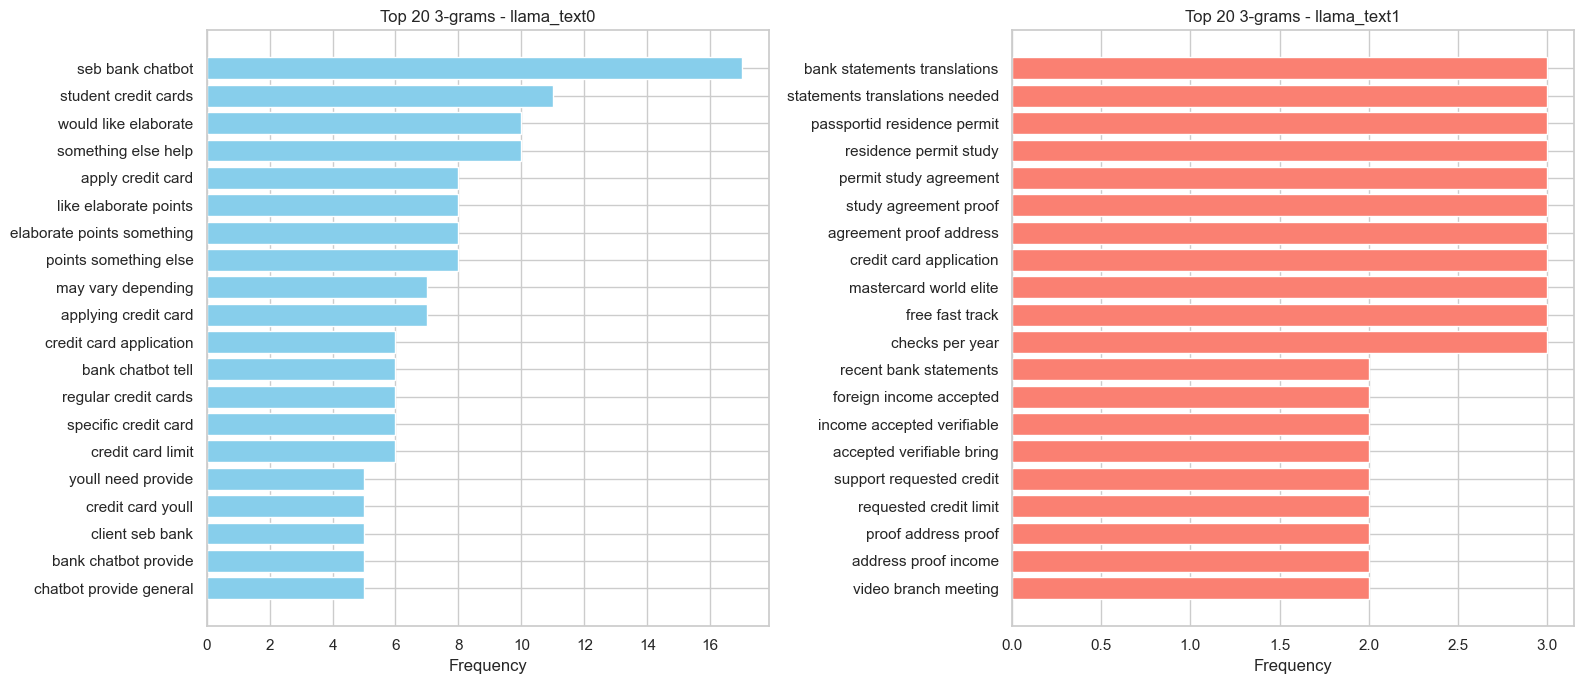

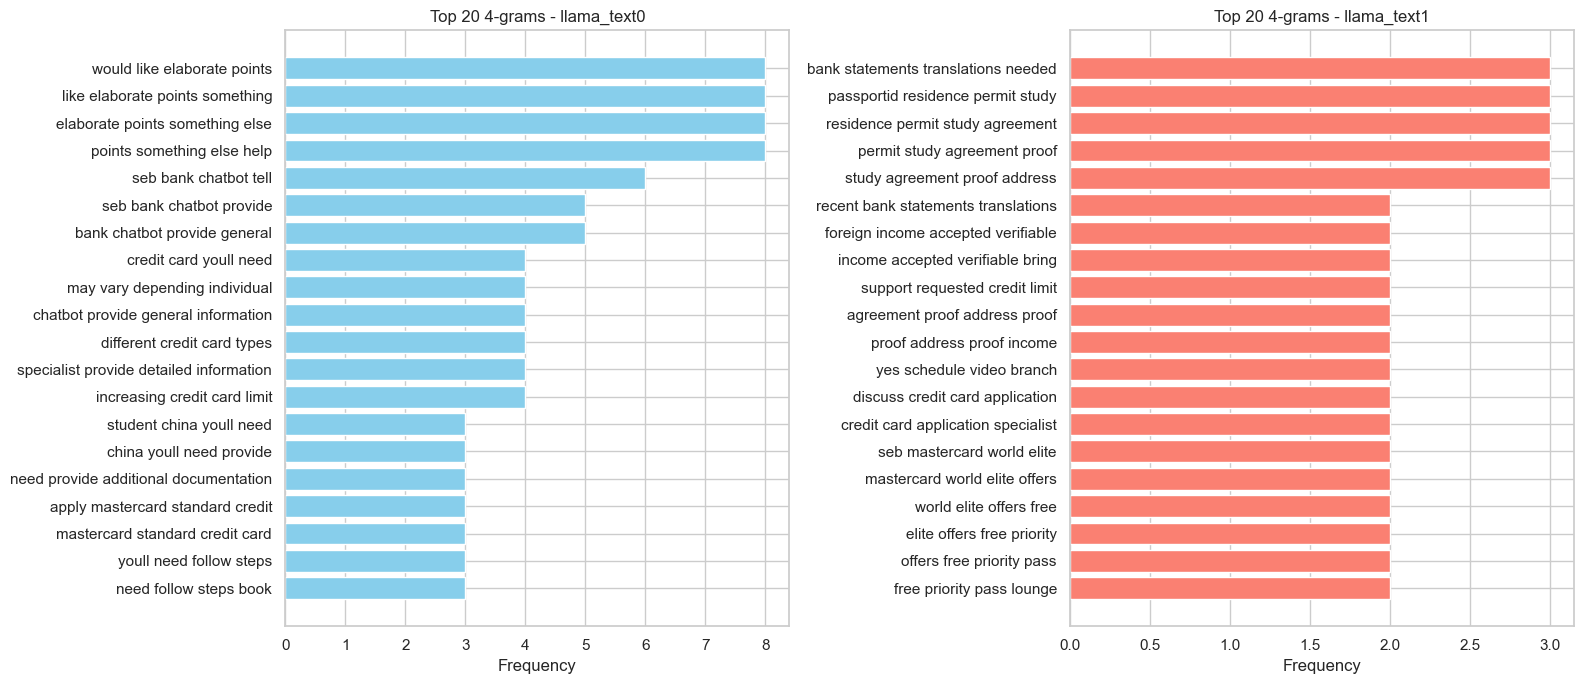

In [ ]:
#n-gram analysis for llama_text0 and llama_text1
import pandas as pd
from collections import Counter
from nltk.util import ngrams
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['llama_text0', 'llama_text1'])

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'\s+', ' ', text)  # remove newline, tabs, multiple spaces
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-letters
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 1]  # remove stopwords and single letters
    return tokens

df_filtered['text0_clean'] = df_filtered['llama_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['llama_text1'].apply(clean_text)

def get_top_ngrams(token_lists, ngram_range=(2,4), top_k=20):
    all_ngrams = {n: Counter() for n in range(ngram_range[0], ngram_range[1]+1)}
    for tokens in token_lists:
        for n in all_ngrams.keys():
            n_grams = ngrams(tokens, n)
            all_ngrams[n].update(n_grams)
    top_ngrams = {n: all_ngrams[n].most_common(top_k) for n in all_ngrams.keys()}
    return top_ngrams

top_ngrams_0 = get_top_ngrams(df_filtered['text0_clean'], ngram_range=(2,4), top_k=20)
top_ngrams_1 = get_top_ngrams(df_filtered['text1_clean'], ngram_range=(2,4), top_k=20)

for n in range(2,5):
    ngram0, freq0 = zip(*[( ' '.join(tup), count) for tup, count in top_ngrams_0[n]])
    ngram1, freq1 = zip(*[( ' '.join(tup), count) for tup, count in top_ngrams_1[n]])
    
    fig, axes = plt.subplots(1, 2, figsize=(16,7))
    
    axes[0].barh(ngram0[::-1], freq0[::-1], color='skyblue')
    axes[0].set_title(f'Top 20 {n}-grams - llama_text0')
    axes[0].set_xlabel('Frequency')
    
    axes[1].barh(ngram1[::-1], freq1[::-1], color='salmon')
    axes[1].set_title(f'Top 20 {n}-grams - llama_text1')
    axes[1].set_xlabel('Frequency')
    
    plt.tight_layout()
    plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


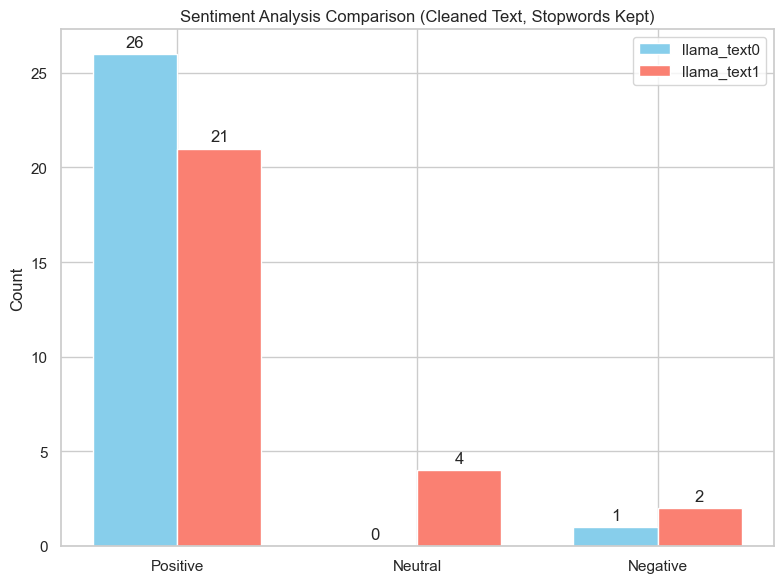

    Question_ID                                                        Text0 (context)  Text0_sentiment_score Text0_sentiment  \
0             1                           as per sebs policies yes you can apply for a                  0.959        Positive   
1             2                           to become a client of seb bank youll need to                  0.986        Positive   
2             3                   as a master student from china youll need to provide                  0.956        Positive   
3             4                youre absolutely correct to become a client of seb bank                  0.827        Positive   
4             5                   thats correct before you can apply for a credit card                  0.957        Positive   
5             6                           as a seb bank chatbot id be happy to provide                  0.996        Positive   
6             7                           as a seb bank chatbot i can provide you with           

In [ ]:
#sentiment analysis for llama_text0 and llama_text1
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
import numpy as np

nltk.download('vader_lexicon')

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1,27)].dropna(subset=['llama_text0','llama_text1'])

def clean_text_full(text):
    text = str(text).lower()
    text = re.sub(r'[\n\r\t\u202f\u00a0]', ' ', text)  # replace newline/tab/special spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # remove non-letters
    text = re.sub(r'\s+', ' ', text)                  # merge multiple spaces
    return text.strip()

df_filtered['text0_clean'] = df_filtered['llama_text0'].apply(clean_text_full)
df_filtered['text1_clean'] = df_filtered['llama_text1'].apply(clean_text_full)

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(str(text))['compound']
    if score >= 0.05:
        label = 'Positive'
    elif score <= -0.05:
        label = 'Negative'
    else:
        label = 'Neutral'
    return pd.Series([score, label])

df_filtered[['text0_compound','text0_sentiment']] = df_filtered['text0_clean'].apply(get_sentiment)
df_filtered[['text1_compound','text1_sentiment']] = df_filtered['text1_clean'].apply(get_sentiment)

sentiment_order = ['Positive','Neutral','Negative']
counts0 = df_filtered['text0_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)
counts1 = df_filtered['text1_sentiment'].value_counts().reindex(sentiment_order, fill_value=0)

x = np.arange(len(sentiment_order))
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
bars0 = ax.bar(x - width/2, counts0, width, label='llama_text0', color='skyblue')
bars1 = ax.bar(x + width/2, counts1, width, label='llama_text1', color='salmon')

ax.set_ylabel('Count')
ax.set_title('Sentiment Analysis Comparison (Cleaned Text, Stopwords Kept)')
ax.set_xticks(x)
ax.set_xticklabels(sentiment_order)
ax.legend()

for bars in [bars0, bars1]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

def first_n_words(text, n=10):
    words = text.split()
    return ' '.join(words[:n])

report_table = pd.DataFrame({
    'Question_ID': df_filtered['question_id'],
    'Text0 (context)': df_filtered['text0_clean'].apply(lambda x: first_n_words(x, 10)),
    'Text0_sentiment_score': df_filtered['text0_compound'].round(3),
    'Text0_sentiment': df_filtered['text0_sentiment'],
    'Text1 (context)': df_filtered['text1_clean'].apply(lambda x: first_n_words(x, 10)),
    'Text1_sentiment_score': df_filtered['text1_compound'].round(3),
    'Text1_sentiment': df_filtered['text1_sentiment']
})

report_table = report_table[['Question_ID',
                             'Text0 (context)', 'Text0_sentiment_score', 'Text0_sentiment',
                             'Text1 (context)', 'Text1_sentiment_score', 'Text1_sentiment']]

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 150)

print(report_table)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\grace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


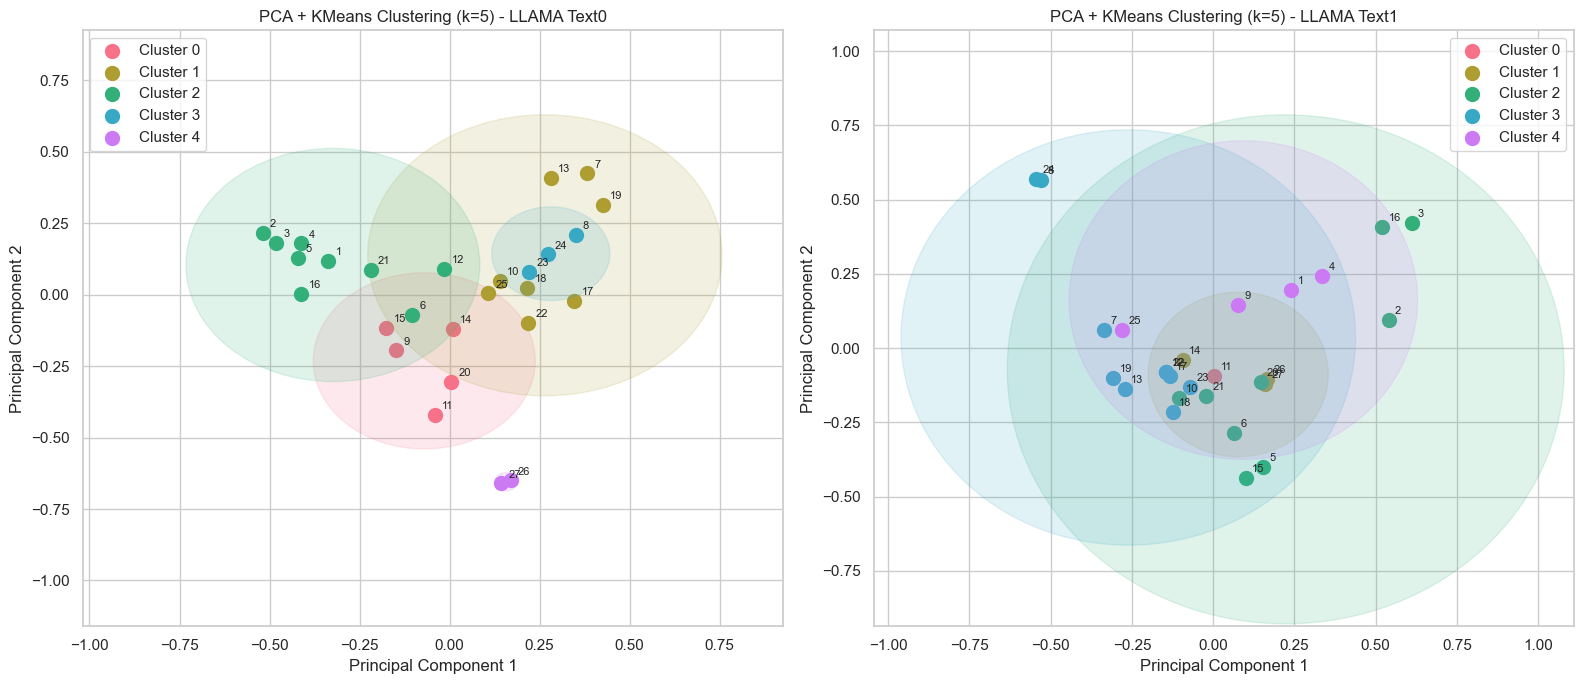

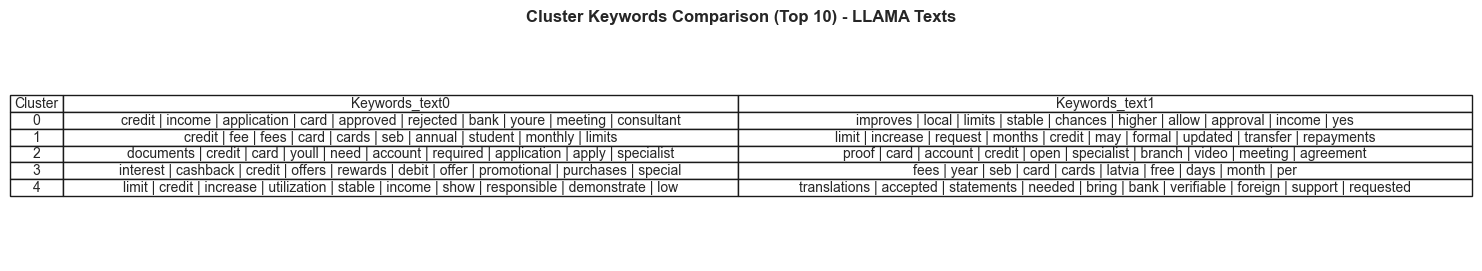

In [ ]:
#pca and clustering for llama_text0 and llama_text1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_excel(r"C:\Users\grace\VisualStudioProject\Thesis\data.xlsm", sheet_name="Hum_LLM")
df_filtered = df[df['question_id'].between(1, 27)].dropna(subset=['llama_text0', 'llama_text1'])

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[\n\r\t\u202f\u00a0]', ' ', text)  # replace newline/tab/special spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # keep only letters
    text = re.sub(r'\s+', ' ', text)                  # remove multiple spaces
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    return " ".join(tokens)

df_filtered['text0_clean'] = df_filtered['llama_text0'].apply(clean_text)
df_filtered['text1_clean'] = df_filtered['llama_text1'].apply(clean_text)

def pca_kmeans(text_series, n_clusters=5, top_n_keywords=10):
    vectorizer = TfidfVectorizer(max_features=500)
    tfidf_matrix = vectorizer.fit_transform(text_series).toarray()
    feature_names = vectorizer.get_feature_names_out()
    
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(tfidf_matrix)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(tfidf_matrix)
    
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    cluster_keywords = {}
    for i in range(n_clusters):
        cluster_keywords[i] = [feature_names[ind] for ind in order_centroids[i, :top_n_keywords]]
    
    return pca_result, clusters, cluster_keywords

pca_result0, clusters0, keywords0 = pca_kmeans(df_filtered['text0_clean'])
pca_result1, clusters1, keywords1 = pca_kmeans(df_filtered['text1_clean'])

df_filtered['PCA0_1'] = pca_result0[:,0]
df_filtered['PCA0_2'] = pca_result0[:,1]
df_filtered['Cluster0'] = clusters0

df_filtered['PCA1_1'] = pca_result1[:,0]
df_filtered['PCA1_2'] = pca_result1[:,1]
df_filtered['Cluster1'] = clusters1

plt.figure(figsize=(16,7))
palette = sns.color_palette("husl", 5)

for idx, (pca_x, pca_y, cluster_labels, title) in enumerate([
    ('PCA0_1','PCA0_2','Cluster0', 'LLAMA Text0'),
    ('PCA1_1','PCA1_2','Cluster1', 'LLAMA Text1')
]):
    plt.subplot(1,2,idx+1)
    
    x_min, x_max = df_filtered[pca_x].min()-0.5, df_filtered[pca_x].max()+0.5
    y_min, y_max = df_filtered[pca_y].min()-0.5, df_filtered[pca_y].max()+0.5
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    for i in range(5):
        cluster_points = df_filtered[df_filtered[cluster_labels]==i]
        x_mean, y_mean = cluster_points[pca_x].mean(), cluster_points[pca_y].mean()
        radius = np.sqrt(((cluster_points[pca_x]-x_mean)**2 + (cluster_points[pca_y]-y_mean)**2).mean())*2.2
        
        circle = plt.Circle((x_mean, y_mean), radius, color=palette[i], alpha=0.15)
        plt.gca().add_artist(circle)
        
        plt.scatter(cluster_points[pca_x], cluster_points[pca_y], s=100, color=palette[i], label=f'Cluster {i}')
    
    for j, row in df_filtered.iterrows():
        plt.text(row[pca_x]+0.02, row[pca_y]+0.02, str(row['question_id']), fontsize=8)
    
    plt.title(f'PCA + KMeans Clustering (k=5) - {title}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()

plt.tight_layout()
plt.show()

cluster_comparison = pd.DataFrame({
    'Cluster': list(range(5)),
    'Keywords_text0': [' | '.join(keywords0[i]) for i in range(5)],
    'Keywords_text1': [' | '.join(keywords1[i]) for i in range(5)]
})

fig, ax = plt.subplots(figsize=(12,3))
ax.axis('off') 

table = ax.table(
    cellText=cluster_comparison.values,
    colLabels=cluster_comparison.columns,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(cluster_comparison.columns))))

plt.title('Cluster Keywords Comparison (Top 10) - LLAMA Texts', fontsize=12, fontweight='bold')
plt.show()
